<a href="https://colab.research.google.com/github/MMarkZhang/WENO_SWENO_Code/blob/main/WENO_AO_SWENO_AO_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research Project for M 379H
Supervisor: Professor Arbogast   
Student: Binglin Zhang   
Note: https://www.overleaf.com/4864958514bfnjkkmshtvp   
Doc: https://docs.google.com/document/d/1753oPfPrWaoogVC9-S6vCth9IBVstB3a2b4wnd7YrWo/edit?pli=1#

### Part A
* Basic code for finite volume approximation   
* Approximate the function by average in stencil in 3,5 order    
* Investigate the accuracy    
* Deduct the order from error term 

**Problem**  
Suppose an unknow function $u(x)$  
We can define $h$ as the width of each cell  
Therefore, we calculate the average in each cell as $\bar{u_i} = \frac{1}{\Delta x}\int_{x_i-\frac{1}{2}}^{x_i+\frac{1}{2}}u(x)d_x$  
Then we use polynomial $p(x)$ to reconstruct the $u$ from some $\bar{u_i}$  
Finally we compare the approximation the accuracy of $p(x)$ with $u(x)$ on special point $x_*$


#### Basic Set-ups

In [60]:
!python --version

Python 3.7.10


In [61]:
import numpy as np 
import math 
from math import sqrt

In [175]:
# define a function u(x) here 

def func_u(x):
  return np.sin(x)

def func_u_2(x):
  return np.cos(x)

def func_u_3(x):
  return np.exp(x)

def func_u_4(x):
  return np.log(x)

# e.g. sin(pi/2) = 1
print(func_u(np.pi/2.0))

1.0


In [63]:
# calculate the average \bar_{u_i} 
from scipy import integrate

# 
def integral(func, lower, upper):
  value, error = integrate.quad(func, lower, upper)
  return value 

def integral_average(func, lower, upper):
  value, error = integrate.quad(func, lower, upper)
  return value / (upper-lower)

def sin_integral_average(lower, upper):
  return (np.cos(lower) - np.cos(upper))/(upper-lower)

# check example 
print(integral(func_u, 0, np.pi/2)/(np.pi/2))
print(integral_average(func_u, 0, np.pi/2))
print(sin_integral_average(0, np.pi/2))

0.6366197723675813
0.6366197723675813
0.6366197723675813


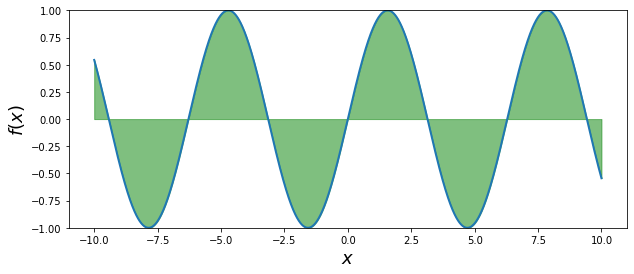

In [64]:
# visualize the function
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

def visualize_func(func, x_left, x_right, y_bottom, y_top):
  fig, ax = plt.subplots(figsize=(10, 4))
  x = np.linspace(x_left, x_right, 10000)
  ax.plot(x, func(x), lw=2)
  ax.fill_between(x, func(x), color='green', alpha=0.5)
  ax.set_xlabel("$x$", fontsize=18)
  ax.set_ylabel("$f(x)$", fontsize=18)
  ax.set_ylim(y_bottom, y_top)
  plt.show()

def visualize_discontinuous_func(func, x_left, x_right, y_bottom, y_top):
  fig, ax = plt.subplots(figsize=(10, 4))
  x = np.linspace(x_left, x_right, 10000)
  y = [func(val) for val in x]
  ax.plot(x, y, lw=2)
  ax.fill_between(x, y, color='green', alpha=0.5)
  ax.set_xlabel("$x$", fontsize=18)
  ax.set_ylabel("$f(x)$", fontsize=18)
  ax.set_ylim(y_bottom, y_top)
  plt.show()


def plot_sin_intervals(func, x, middle_points):
  fig, ax = plt.subplots(figsize=(10, 4))
  ax.plot(x, func(x), lw=2)
  ax.plot(middle_points, func(middle_points), 'o')
  ax.fill_between(x, func(x), color='yellow', alpha=0.5)
  ax.set_xlabel("$x$", fontsize=18)
  ax.set_ylabel("$f(x)$", fontsize=18)
  ax.set_ylim(-1.1, 1.1)
  plt.show()

visualize_func(func_u, -10, 10, -1, 1)

In [65]:
# get averge u_i in a list 
# we first define an x_target and h interval length 
# then we find which 3/5 intervals contains x_target 
# then we calculate their u's 

def get_u_average(order, h, x_target, func_integral_average, func):
  """
  order: integer about the order of approximation
  h: the width of each interval 
  x_target: the target point we are investigating
  func_integral_average: a function representing the 
  average of integration over the given function 
  func: a given function 
  """
  if order not in [3,5]: 
    print("try order 3 or 5") 
    return

  count_h = x_target // h

  x = np.linspace((count_h-order//2)*h,
                  (count_h+1+order//2)*h,
                  num=order+1)
  # middle_points = np.linspace(center-(order//2)*h, 
  #                 center+(order//2)*h, 
  #                 num=order)

  u_averages = []
  for i in range(order):
    u_averages.append(func_integral_average(func, x[i], x[i+1]))

  # print("we have intervals as:\n", x)
  # print("we have middle points as:\n", middle_points)
  # print("we have average of integration as:\n", u_averages)
  # return x, middle_points, u_averages

  return x, u_averages


# get u_i without averaging for uniform grid
def get_u(order, h, x_target, integral, func):
  """
  order: integer about the order of approximation
  h: the width of each interval 
  x_target: the target point we are investigating
  func_integral: a function representing the integration over the given function 
  func: a given function 
  """
  if order not in [3,5]: 
    print("try order 3 or 5") 
    return

  count_h = x_target // h

  x = np.linspace((count_h-order//2)*h,
                  (count_h+1+order//2)*h,
                  num=order+1)
  # middle_points = np.linspace(center-(order//2)*h, 
  #                 center+(order//2)*h, 
  #                 num=order)

  u = []
  for i in range(order):
    u.append(integral(func, x[i], x[i+1]))

  # return x, middle_points, u
  return x, u


In [66]:
# get an example for center pi/2 and each interval of pi/3
x_vals, u_averages = get_u_average(5, 2**-4, sqrt(2), integral_average, func_u)
x_vals

array([1.25  , 1.3125, 1.375 , 1.4375, 1.5   , 1.5625])

#### Third-order Polynomial Reconstruction


For the third-order polynomial reconstruction, we are using the equation $p(x) = a + bx + cx^2 \approx u(x)$  
So we do an integration on both side on each interval and get:  
$$ a \int_{I_j} 1 + b \int_{I_j}x + c \int_{I_j}x^2 = \bar{u_j}\Delta{x_j}, \quad j = i-1,i,i+1$$  
we can rewrite the left as $ah + \frac{1}{2}bh(x_{j+\frac{1}{2}}+x_{j-\frac{1}{2}}) + \frac{1}{3}c(x_{j+\frac{1}{2}}^3-x_{j-\frac{1}{2}}^3) = \bar{u_j}h = u_j$ if we use uniform grid   
This can be rewritten into a matrix solving problem for $AC = U$  
where $A$ and $U$ are known, and $C$ are the target coefficients

In [67]:
# set h and center x_i
h = np.pi/10
x_i = np.pi/2

In [68]:
# get sample data
# x_vals, middle_points, u_averages = get_u_average(3, h, x_i, integral_average, func_u)
# plot_sin_intervals(func_u, x_vals, middle_points)

In [69]:
from scipy import linalg

x_vals, u_averages = get_u_average(3, h, x_i, integral_average, func_u)

A = []
for i in range(3):
  a_1 = h 
  a_2 = h * (x_vals[i]+x_vals[i+1]) / 2
  a_3 = (x_vals[i+1]**3 - x_vals[i]**3) / 3
  A.append([a_1, a_2, a_3])
print(A)

U = [[u_i*h] for u_i in u_averages]
print(U)

C = linalg.solve(np.array(A), np.array(U))
print(C)

# verify the matrix calculation 
print("should be 0:\n", np.dot(A,C)-U)

[[0.3141592653589793, 0.4441321980490211, 0.6304609591660962], [0.3141592653589793, 0.5428282420599146, 0.9405237259690945], [0.3141592653589793, 0.6415242860708082, 1.312599046132692]]
[[0.3090169943749474], [0.3090169943749474], [0.2787682579175257]]
[[-0.20387989]
 [ 1.53241889]
 [-0.48778408]]
should be 0:
 [[0.00000000e+00]
 [5.55111512e-17]
 [5.55111512e-17]]


In [70]:
# third order recontruction
def third_order_approx(x):
  return C[0] + C[1]*x + C[2]*(x**2)

third_order_approx(np.pi/2)[0]

0.9996790961817419

In [71]:
print(integral_average(third_order_approx, x_vals[1], x_vals[2])) 
print(integral_average(func_u, x_vals[1], x_vals[2]))

0.9836316430834661
0.983631643083466


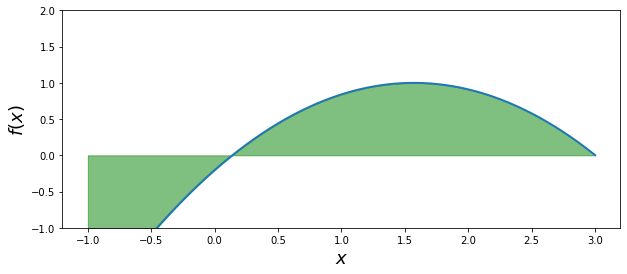

In [72]:
visualize_func(third_order_approx, -1, 3, -1, 2)

In [73]:
# # pack everything into one function with h 
# def third_order_reconstruction_error(h, x_i, integral_average, func_u):
#   x_vals, u_averages = get_u_average(3, h, x_i, integral_average, func_u)
#   A = []
#   for i in range(3):
#     a_1 = h 
#     a_2 = h * (x_vals[i]+x_vals[i+1]) / 2
#     a_3 = (x_vals[i+1]**3 - x_vals[]**3) / 3
#     A.append([a_1, a_2, a_3])

#   U = [[u_i*h] for u_i in u_averages]

#   C = linalg.solve(np.array(A), np.array(U))
#   return A, C, U
#   # error = np.abs(C[0] + c[1]*x_i + c[2]*(x_i**2) - func_u(x_i))
#   # return error[0]

def third_order_reconstruction_error(h, x_i, integral, func_u):
  x_vals, u = get_u(3, h, x_i, integral, func_u)
  A = []
  for i in range(3):
    a_1 = h 
    a_2 = h * (x_vals[i]+x_vals[i+1]) / 2
    a_3 = (x_vals[i+1]**3 - x_vals[i]**3) / 3
    A.append([a_1, a_2, a_3])

  U = u

  # print(A)
  # print(U)
  C = linalg.solve(np.array(A), np.array(U))
  # x_i += np.pi/24
  error = np.abs(C[0] + C[1]*x_i + C[2]*(x_i**2) - func_u(x_i))
  return error

In [74]:
third_order_reconstruction_error(2**-15, sqrt(2), integral, func_u)

5.551115123125783e-16

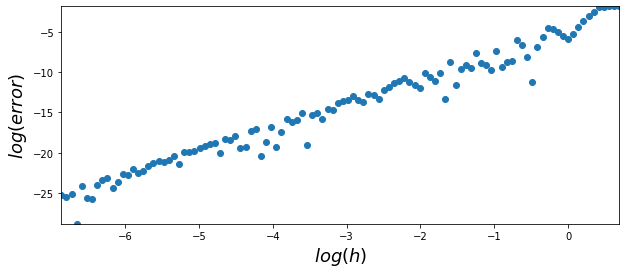

LinregressResult(slope=3.0280941453411727, intercept=-4.9912189877989945, rvalue=0.986278228946039, pvalue=2.5376192449976426e-86, stderr=0.048773416109835876)

In [75]:
from scipy import stats 
from math import sqrt
h = [2**(-0.1*n) for n in range(-10,100)]
target = sqrt(2)
log_errors = []
for val in h: 
  log_errors.append(np.log(third_order_reconstruction_error(val, target, integral, func_u)))

log_h = [np.log(val) for val in h]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(log_h, log_errors, 'o')
ax.set_xlabel("$log(h)$", fontsize=18)
ax.set_ylabel("$log(error)$", fontsize=18)
ax.set_ylim(min(log_errors), max(log_errors))
ax.set_xlim(min(log_h), max(log_h))
plt.show()

stats.linregress(log_h, log_errors)

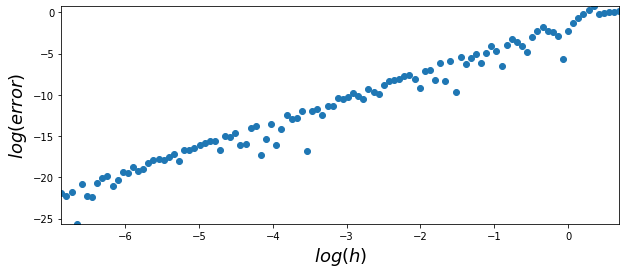

LinregressResult(slope=3.0101012508050866, intercept=-1.783345462848013, rvalue=0.9875923330532931, pvalue=1.1441610964402591e-88, stderr=0.04605748685747322)

In [76]:
h = [2**(-0.1*n) for n in range(-10,100)]
target = sqrt(2)
log_errors = []
for val in h: 
  log_errors.append(np.log(third_order_reconstruction_error(val, target, integral, func_u_3)))

log_h = [np.log(val) for val in h]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(log_h, log_errors, 'o')
ax.set_xlabel("$log(h)$", fontsize=18)
ax.set_ylabel("$log(error)$", fontsize=18)
ax.set_ylim(min(log_errors), max(log_errors))
ax.set_xlim(min(log_h), max(log_h))
plt.show()

stats.linregress(log_h, log_errors)

#### Fifth-order Polynomial Reconstruction


For the third-order polynomial reconstruction, we are using the equation $p(x) = a + bx + cx^2 + dx^3 + ex^4 \approx u(x)$  
So we do an integration on both side on each interval and get:  
$$ a \int_{I_j} 1 + b \int_{I_j}x + c \int_{I_j}x^2 + d \int_{I_j}x^3 + e \int_{I_j}x^4 = \bar{u_j}\Delta{x_j}, \quad j = i-1,i,i+1$$  
we can rewrite the left as $ah + \frac{1}{2}bh(x_{j+\frac{1}{2}}+x_{j-\frac{1}{2}}) + \frac{1}{3}c(x_{j+\frac{1}{2}}^3-x_{j-\frac{1}{2}}^3) + \frac{1}{4}d(x_{j+\frac{1}{2}}^4-x_{j-\frac{1}{2}}^4) + \frac{1}{5}e(x_{j+\frac{1}{2}}^5-x_{j-\frac{1}{2}}^5)= \bar{u_j}h = u_j$ if we use uniform grid   
This can be rewritten into a matrix solving problem for $AC = U$  
where $A$ and $U$ are known, and $C$ are the target coefficients

In [77]:
def fifth_order_reconstruction_error(h, x_i, integral, func_u):
  x_vals, u = get_u(5, h, x_i, integral, func_u)
  A = []
  for i in range(5):
    a_1 = h 
    a_2 = h * (x_vals[i+1]+x_vals[i]) / 2
    # a_2 = (x_vals[i+1]**2 - x_vals[i]**2) / 2
    a_3 = (x_vals[i+1]**3 - x_vals[i]**3) / 3
    a_4 = (x_vals[i+1]**4 - x_vals[i]**4) / 4
    a_5 = (x_vals[i+1]**5 - x_vals[i]**5) / 5
    A.append([a_1, a_2, a_3, a_4, a_5])

  U = u

  C = linalg.solve(np.array(A), np.array(U))
  # x_i -= np.pi/20
  error = np.abs(C[0] + C[1]*x_i + C[2]*(x_i**2) + C[3]*(x_i**3) + C[4]*(x_i**4) - func_u(x_i))
  return error

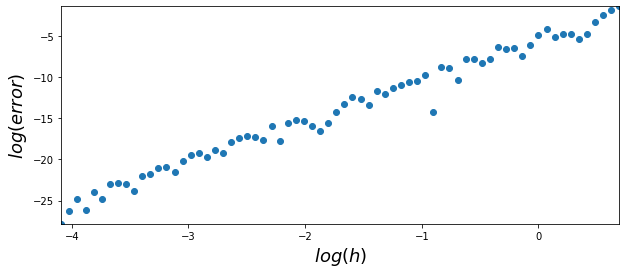

LinregressResult(slope=4.940480468648019, intercept=-5.588575566698287, rvalue=0.9916845228876973, pvalue=2.736992139733307e-62, stderr=0.07774904363239554)

In [78]:
from scipy import stats 
# h = [2**(-0.1*n) for n in range(-10,100)]
h = [2**(-0.1*n) for n in range(-10,60)]
target = sqrt(5)
log_errors = []
for val in h: 
  log_errors.append(np.log(fifth_order_reconstruction_error(val, target, integral, func_u)))

log_h = [np.log(val) for val in h]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(log_h, log_errors, 'o')
ax.set_xlabel("$log(h)$", fontsize=18)
ax.set_ylabel("$log(error)$", fontsize=18)
ax.set_ylim(min(log_errors), max(log_errors))
ax.set_xlim(min(log_h), max(log_h))
plt.show()

stats.linregress(log_h, log_errors)

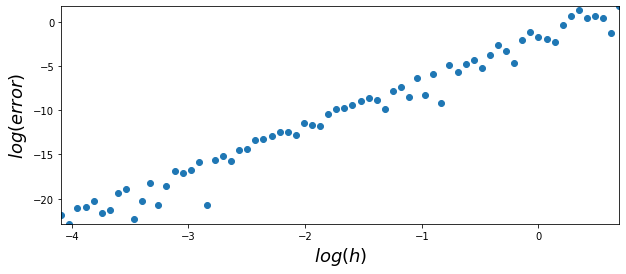

LinregressResult(slope=5.079097622627456, intercept=-1.8900145678085245, rvalue=0.9886192982759057, pvalue=1.1205205966979978e-57, stderr=0.09372670844281665)

In [79]:
h = [2**(-0.1*n) for n in range(-10,60)]
target = sqrt(8)
log_errors = []
for val in h: 
  log_errors.append(np.log(fifth_order_reconstruction_error(val, target, integral, func_u_3)))

log_h = [np.log(val) for val in h]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(log_h, log_errors, 'o')
ax.set_xlabel("$log(h)$", fontsize=18)
ax.set_ylabel("$log(error)$", fontsize=18)
ax.set_ylim(min(log_errors), max(log_errors))
ax.set_xlim(min(log_h), max(log_h))
plt.show()

stats.linregress(log_h, log_errors)

### Part B WENO-AO Reconstruction  
We took Smoothness Indicators into account in this problem   
We first calculate the smoothness indicators $\sigma^5, \sigma_L^3, \sigma_C^3, \sigma_R^3$ with equation:  
$$ 
\begin{aligned} 
\sigma_L^3 &=\frac{13}{12}\left(f_{i-2}-2 f_{i-1}+f_{i}\right)^{2}+\frac{1}{4}\left(f_{i-2}-4 f_{i-1}+3 f_{i}\right)^{2} \\
\sigma_C^3 &=\frac{13}{12}\left(f_{i-1}-2 f_{i}+f_{i+1}\right)^{2}+\frac{1}{4}\left(f_{i-1}-f_{i+1}\right)^{2} \\
\sigma_R^3&=\frac{13}{12}\left(f_{i}-2 f_{i+1}+f_{i+2}\right)^{2}+\frac{1}{4}\left(3 f_{i}-4 f_{i+1}+f_{i+2}\right)^{2}
\end{aligned}
$$ 
And $$\left(\sigma^5\right)^{(1)}=\left(u_{51}+\frac{u_{53}}{10}\right)^{2}+\frac{13}{3}\left(u_{52}+\frac{123}{455} u_{54}\right)^{2}+\frac{781}{20}\left(u_{53}\right)^{2}+\frac{1421461}{2275}\left(u_{54}\right)^{2}$$ where
$$ 
\begin{aligned} 
u_{51} &=\frac{1}{120}\left(11 f_{i-2}-82 f_{i-1}+82 f_{i+1}-11 f_{i+2}\right) \\
u_{52} &=\frac{1}{56}\left(-3 f_{i-2}+40 f_{i-1}-74 f_{i}+40 f_{i+1}-3 f_{i+2}\right) \\
u_{53} &=\frac{1}{12}\left(-f_{i-2}+2 f_{i-1}-2 f_{i+1}+f_{i+2}\right) \\
u_{54} &=\frac{1}{24}\left(f_{i+2}-4 f_{i-1}+6 f_{i}-4 f_{i+1}+f_{i+2}\right)
\end{aligned}
$$   
**Cite:** _Kumar, Rakesh, and Praveen Chandrashekar. "Simple smoothness indicator and multi-level adaptive order WENO scheme for hyperbolic conservation laws." Journal of Computational Physics 375 (2018): 1059-1090._

And we can plug in $\bar{u_i}$ for $f_i$  

After calculating the smoothness indicators, we start with an initial weight of $$\gamma^5=1-0.2*3=0.4, \quad \gamma_L^3=\gamma_C^3=\gamma_R^3=0.2$$  
Then we used the calculation:  
$$ 
\begin{aligned} 
\hat{\gamma}^5 &= \frac{\gamma^5}{(\sigma^5+\epsilon_0h^2)^\eta} \\
\tilde{\gamma}^5 &= \frac{\hat{\gamma}^5}{ \hat{\gamma}^5 + \hat{\gamma}_L^3 + \hat{\gamma}_C^3 + \hat{\gamma}_R^3} \\
\hat{\gamma}_i^3 &= \frac{\gamma_i^3}{(\sigma^3+\epsilon_0h^2)^\eta} \\
\tilde{\gamma}_i^3 &= \frac{\hat{\gamma}_i^3}{ \hat{\gamma}^5 + \hat{\gamma}_{i-1}^3 + \hat{\gamma}_{i}^3 + \hat{\gamma}_{i+1}^3} 
\end{aligned}
$$   
with $\epsilon_0 = 1, \eta = 2$. And finally we can use what we have to calculate: 
$$
R = \frac{\tilde{\gamma}^5}{\gamma^5}\left[ P^5 - \sum_j{\gamma_j^3P_j^3} \right] + \sum_j{\tilde{\gamma}_j^3P_j^3} 
$$

#### WENO-AO for Continous Function

In [80]:
h = 2 ** -5
x_i = sqrt(2)

# get five u_average
x_vals, u_averages = get_u_average(5, h, x_i, integral_average, func_u)

# calculate third order sigmas 
# i-2 = 0, i = 2, i+2 = 4
sigma_L = (13/12)*((u_averages[0]-2*u_averages[1]+u_averages[2])**2) + (1/4)*((u_averages[0]-4*u_averages[1]+3*u_averages[2])**2)
sigma_C = (13/12)*((u_averages[1]-2*u_averages[2]+u_averages[3])**2) + (1/4)*((u_averages[1]-  u_averages[3])**2)
sigma_R = (13/12)*((u_averages[2]-2*u_averages[3]+u_averages[4])**2) + (1/4)*((3*u_averages[2]-4*u_averages[3]+u_averages[4])**2)
print(sigma_L, sigma_C, sigma_R)

2.2512298536620826e-05 2.2499552755208758e-05 2.252685746730847e-05


In [81]:
# calculate fifth order sigma 
# i-2 = 0, i = 2, i+2 = 4
u_51 = (11*u_averages[0] - 82*u_averages[1] + 82*u_averages[3] - 11*u_averages[4]) / 120
u_52 = (-3*u_averages[0] + 40*u_averages[1] - 74*u_averages[2] + 40*u_averages[3] -  3*u_averages[4]) / 56
u_53 = (  -u_averages[0] +  2*u_averages[1] -  2*u_averages[3] +    u_averages[4]) / 12
u_54 = (   u_averages[0] -  4*u_averages[1] +  6*u_averages[2] -  4*u_averages[3] +   u_averages[4]) / 24

# print(u_51, u_52, u_53, u_54)

# get sigma^5
sigma_5 = (u_51+(u_53/10))**2 + (13/3)*((u_52+123*u_54/455)**2) + (781/20)*(u_53**2) + (1421461/2275)*(u_54**2)

# print(sigma_5)

sigma_values = [sigma_5, sigma_L, sigma_C, sigma_R]
print("sigma values are", sigma_values)

sigma values are [2.2506738128538957e-05, 2.2512298536620826e-05, 2.2499552755208758e-05, 2.252685746730847e-05]


In [82]:
# initialize gamma
gamma_5 = 0.4 
gamma_L = gamma_C = gamma_R = 0.2 
initial_gamma_values = [gamma_5, gamma_L, gamma_C, gamma_R]


# calculate \hat{gamma}
hat_gamma_values = []
for index in range(4):
  hat_gamma_values.append(initial_gamma_values[index] / ((sigma_values[index] + h**2)**2))

print("hat^ gamma values are", hat_gamma_values)


# calculate \tilde{gamma}
sum_hat_gamma_values = sum(hat_gamma_values)
print(sum_hat_gamma_values)
tilde_gamma_values = [val / sum_hat_gamma_values for val in hat_gamma_values]
print("tilde~ gamma values are", tilde_gamma_values)

hat^ gamma values are [400745.65037000185, 200370.5948183102, 200375.70740583524, 200364.7551797932]
1001856.7077739405
tilde~ gamma values are [0.4000029617613004, 0.19999925464742402, 0.20000435775996034, 0.19999342583131519]


In [83]:
def fifth_order_reconstruction(x_vals, u_averages, h, x_i):
  A = []
  for i in range(5):
    a_1 = h 
    a_2 = h * (x_vals[i+1]+x_vals[i]) / 2
    a_3 = (x_vals[i+1]**3 - x_vals[i]**3) / 3
    a_4 = (x_vals[i+1]**4 - x_vals[i]**4) / 4
    a_5 = (x_vals[i+1]**5 - x_vals[i]**5) / 5
    A.append([a_1, a_2, a_3, a_4, a_5])

  U = [u*h for u in u_averages]

  C = linalg.solve(np.array(A), np.array(U))
  
  return C[0] + C[1]*x_i + C[2]*(x_i**2) + C[3]*(x_i**3) + C[4]*(x_i**4)

def third_order_reconstruction(x_vals, u_averages, h, x_i):
  A = []
  for i in range(3):
    a_1 = h 
    a_2 = h * (x_vals[i]+x_vals[i+1]) / 2
    a_3 = (x_vals[i+1]**3 - x_vals[i]**3) / 3
    A.append([a_1, a_2, a_3])

  U = [u*h for u in u_averages]

  C = linalg.solve(np.array(A), np.array(U))
  return C[0] + C[1]*x_i + C[2]*(x_i**2)

In [84]:
# recontruct polynomial functions
P_5 = fifth_order_reconstruction(x_vals, u_averages, h, x_i)
P_3_values = [] 
for index in range(3): 
  P_3_values.append(third_order_reconstruction(
      x_vals[index:index+4], u_averages[index:index+3], h, x_i))
print(P_5)
print(P_3_values)
print("real sin(sqrt(2)) value: ", np.sin(x_i))

# reconstruct the whole equation 
R =  (tilde_gamma_values[0]/initial_gamma_values[0]) * \
      (P_5 - sum(initial_gamma_values[i+1]*P_3_values[i] for i in range(3))) + \
      sum(tilde_gamma_values[i+1]*P_3_values[i] for i in range(3))

print(R)
print(R-np.sin(x_i))

0.9877659460382019
[0.9877654943762132, 0.9877661651053089, 0.9877657151033321]
real sin(sqrt(2)) value:  0.9877659459927356
0.9877659460416979
4.8962278675901416e-11


In [85]:
# Put into a whole piece

def WENO_AO_Recontruction(h, x_i, integral_average, func_u):
  # get five u_average
  x_vals, u_averages = get_u_average(5, h, x_i, integral_average, func_u)

  # calculate third order sigmas 
  # i-2 = 0, i = 2, i+2 = 4
  sigma_L = (13/12)*((u_averages[0]-2*u_averages[1]+u_averages[2])**2) + (1/4)*((  u_averages[0]-4*u_averages[1] + 3*u_averages[2])**2)
  sigma_C = (13/12)*((u_averages[1]-2*u_averages[2]+u_averages[3])**2) + (1/4)*((  u_averages[1] - u_averages[3])**2)
  sigma_R = (13/12)*((u_averages[2]-2*u_averages[3]+u_averages[4])**2) + (1/4)*((3*u_averages[2]-4*u_averages[3]  +  u_averages[4])**2)

  # calculate fifth order sigma 
  u_51 = (11*u_averages[0] - 82*u_averages[1] + 82*u_averages[3] - 11*u_averages[4]) / 120
  u_52 = (-3*u_averages[0] + 40*u_averages[1] - 74*u_averages[2] + 40*u_averages[3] -  3*u_averages[4]) / 56
  u_53 = (  -u_averages[0] +  2*u_averages[1] -  2*u_averages[3] +    u_averages[4]) / 12
  u_54 = (   u_averages[0] -  4*u_averages[1] +  6*u_averages[2] -  4*u_averages[3] +   u_averages[4]) / 24

  # get sigma^5
  sigma_5 = (u_51+(u_53/10))**2 + (13/3)*((u_52+123*u_54/455)**2) + (781/20)*(u_53**2) + (1421461/2275)*(u_54**2)

  # all sigma values 
  sigma_values = [sigma_5, sigma_L, sigma_C, sigma_R]
  # print([val/(h**2) for val in sigma_values])

  # initialize gamma
  gamma_5 = 0.4 
  gamma_L = gamma_C = gamma_R = 0.2 
  initial_gamma_values = [gamma_5, gamma_L, gamma_C, gamma_R]

  # calculate \hat{gamma}
  hat_gamma_values = []
  for index in range(4):
    hat_gamma_values.append(initial_gamma_values[index] / ((sigma_values[index] + h**2)**2))

  # calculate \tilde{gamma}
  sum_hat_gamma_values = sum(hat_gamma_values)
  tilde_gamma_values = [val / sum_hat_gamma_values for val in hat_gamma_values]

  # recontructpolynomial functions
  P_5 = fifth_order_reconstruction(x_vals, u_averages, h, x_i)
  P_3_values = [] 
  for index in range(3): 
    P_3_values.append(third_order_reconstruction(
        x_vals[index:index+4], u_averages[index:index+3], h, x_i))

  # reconstruct the whole equation 
  # print((tilde_gamma_values[0]/initial_gamma_values[0]))
  R = (tilde_gamma_values[0]/initial_gamma_values[0]) * \
        (P_5 - sum(initial_gamma_values[i+1]*P_3_values[i] for i in range(3))) + \
        sum(tilde_gamma_values[i+1]*P_3_values[i] for i in range(3))

  return R

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: LinAlgWarning: Ill-conditioned matrix (rcond=3.8668e-17): result may not be accurate.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: LinAlgWarning: Ill-conditioned matrix (rcond=4.16886e-17): result may not be accurate.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: LinAlgWarning: Ill-conditioned matrix (rcond=1.33603e-17): result may not be accurate.
  del sys.path[0]


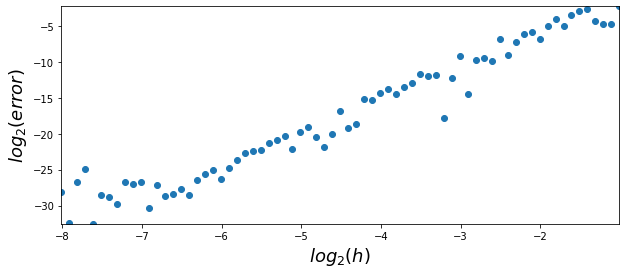

LinregressResult(slope=4.243960322529235, intercept=1.648509749641228, rvalue=0.9766792482066228, pvalue=7.723458728615723e-48, stderr=0.1123140748689426)

In [217]:
h = [2**(-0.1*n-0.01) for n in range(10,81)]
target = sqrt(40)
log_errors = []
for val in h: 
  log_errors.append(np.log2(np.abs(WENO_AO_Recontruction(val, target, integral_average, func_u_3) - func_u_3(target))))

log_h = [np.log2(val) for val in h]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(log_h, log_errors, 'o')
ax.set_xlabel("$log_2(h)$", fontsize=18)
ax.set_ylabel("$log_2(error)$", fontsize=18)
ax.set_ylim(min(log_errors), max(log_errors))
ax.set_xlim(min(log_h), max(log_h))
plt.show()

stats.linregress(log_h, log_errors)

In [87]:
print(np.abs(WENO_AO_Recontruction(2**-5, sqrt(2), integral_average, func_u) - func_u(sqrt(2))))
print(fifth_order_reconstruction_error(2**-5, sqrt(2), integral, func_u))

4.8962278675901416e-11
4.546629739365926e-11


#### WENO-AO for Discontinous Functions

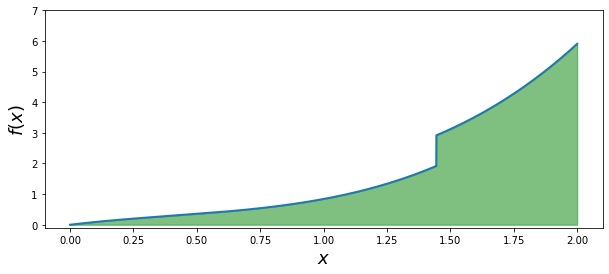

In [88]:
def discontinuous_func(x): 
  val = x**3 - x**2 + np.sin(x) + (1 if (x > sqrt(2)+0.03) else 0)
  return val 

visualize_discontinuous_func(discontinuous_func, 0, 2, -0.1, 7)

In [89]:
integrate.quad(discontinuous_func, 1, 2, points=(1, sqrt(2)+0.03, 2))

(2.9289022467088537, 3.25173471117252e-14)

In [90]:
integrate.quad(discontinuous_func, 1, 2)

(2.9289022543373284, 3.081832034013132e-08)

In [91]:
def integral_average_discontinuous_func(func, break_point, lower, upper):
  if(break_point > lower and break_point < upper):
    val = integrate.quad(func, lower, upper, points=(lower, break_point, upper))[0]
  else: 
    val = integrate.quad(func, lower, upper)[0]
  return val / (upper-lower)


def get_u_average_discontinuous_func(h, x_target, func, break_point):

  count_h = x_target // h

  x = np.linspace((count_h-2)*h,
                  (count_h+3)*h,
                  num=6)

  u_averages = []
  for i in range(5):
    u_averages.append(integral_average_discontinuous_func(func, break_point, x[i], x[i+1]))

  return x, u_averages

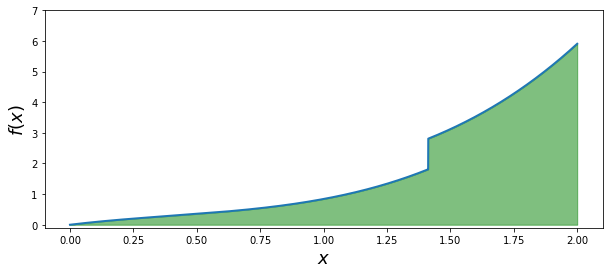

In [92]:
# override for ensuring one good glide 
def discontinuous_func_2(x): 
  val = x**3 - x**2 + np.sin(x) + (1 if (x > sqrt(2)-(2**-9)) else 0)
  return val 

def discontinuous_func_3(x): 
  val = x**3 - x**2 + np.sin(x) + (4 if (x > sqrt(2)-(2**-9)) else 0)
  return val 

def get_u_average_discontinuous_func(h, x_target, func, break_point):

  count_h = x_target // h

  # x = np.linspace((count_h-2)*h,
  #                 (count_h+3)*h,
  #                 num=6)

  x = np.linspace(sqrt(2)-(2*h),
                  sqrt(2)+(3*h),
                  num=6)

  u_averages = []
  for i in range(5):
    u_averages.append(integral_average_discontinuous_func(func, break_point, x[i], x[i+1]))

  return x, u_averages
  
visualize_discontinuous_func(discontinuous_func_2, 0, 2, -0.1, 7)

In [93]:
# discontinuous case 

def WENO_AO_Recontruction_Discontinuous(h, x_i, func_u, break_point):
  # get five u_average
  x_vals, u_averages = get_u_average_discontinuous_func(h, x_i, func_u, break_point)
  # print(x_vals)

  # calculate third order sigmas 
  # i-2 = 0, i = 2, i+2 = 4
  sigma_L = (13/12)*((u_averages[0]-2*u_averages[1]+u_averages[2])**2) + (1/4)*((u_averages[0]-4*u_averages[1]+3*u_averages[2])**2)
  sigma_C = (13/12)*((u_averages[1]-2*u_averages[2]+u_averages[3])**2) + (1/4)*((u_averages[1]-  u_averages[3])**2)
  sigma_R = (13/12)*((u_averages[2]-2*u_averages[3]+u_averages[4])**2) + (1/4)*((3*u_averages[2]-4*u_averages[3]+u_averages[4])**2)

  # calculate fifth order sigma 
  u_51 = (11*u_averages[0] - 82*u_averages[1] + 82*u_averages[3] - 11*u_averages[4]) / 120
  u_52 = (-3*u_averages[0] + 40*u_averages[1] - 74*u_averages[2] + 40*u_averages[3] -  3*u_averages[4]) / 56
  u_53 = (  -u_averages[0] +  2*u_averages[1] -  2*u_averages[3] +    u_averages[4]) / 12
  u_54 = (   u_averages[0] -  4*u_averages[1] +  6*u_averages[2] -  4*u_averages[3] +   u_averages[4]) / 24

  # get sigma^5  
  sigma_5 = (u_51+(u_53/10))**2 + (13/3)*((u_52+123*u_54/455)**2) + (781/20)*(u_53**2) + (1421461/2275)*(u_54**2)

  # all sigma values 
  sigma_values = [sigma_5, sigma_L, sigma_C, sigma_R]

  # initialize gamma
  gamma_5 = 0.4 
  gamma_L = gamma_C = gamma_R = 0.2 
  initial_gamma_values = [gamma_5, gamma_L, gamma_C, gamma_R]

  # calculate \hat{gamma}  
  hat_gamma_values = []
  for index in range(4):
    hat_gamma_values.append(initial_gamma_values[index] / ((sigma_values[index] + h**2)**2))

  # calculate \tilde{gamma}  
  sum_hat_gamma_values = sum(hat_gamma_values)
  tilde_gamma_values = [val / sum_hat_gamma_values for val in hat_gamma_values]
  # print(tilde_gamma_values)
  # recontruct polynomial functions  
  P_5 = fifth_order_reconstruction(x_vals, u_averages, h, x_i)
  P_3_values = [] 
  for index in range(3): 
    P_3_values.append(third_order_reconstruction(
        x_vals[index:index+4], u_averages[index:index+3], h, x_i))

  # reconstruct the whole equation 
  R = (tilde_gamma_values[0]/initial_gamma_values[0]) * \
        (P_5 - sum(initial_gamma_values[i+1]*P_3_values[i] for i in range(3))) + \
        sum(tilde_gamma_values[i+1]*P_3_values[i] for i in range(3))

  return R

In [94]:
# WENO_AO_Recontruction(h, x_i, func_u, break_point)
print(WENO_AO_Recontruction_Discontinuous(2**-6, sqrt(2)+2**-9, discontinuous_func_2, sqrt(2)-2**-9))
print(discontinuous_func_2(sqrt(2)+2**-9))

2.822703564626741
2.822702619475815


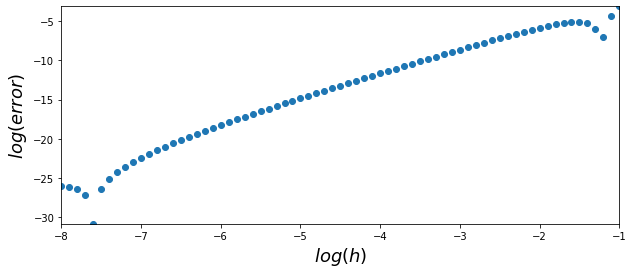

LinregressResult(slope=3.336792492939344, intercept=0.9731902817229265, rvalue=0.9836643756931043, pvalue=4.0153748196652047e-53, stderr=0.07351224340027364)

In [95]:
# h = [2**(-0.1*n) for n in range(91, 100)]
h = [2**(-0.1*n) for n in range(10, 81)]
# h = [2**(-0.1*n) for n in range(10, 40)]

target = sqrt(2)+(2**-9)
log_errors = []
for val in h: 
  log_errors.append(np.log2(np.abs(WENO_AO_Recontruction_Discontinuous(val, target, discontinuous_func_3, sqrt(2)-(2**-9)) - discontinuous_func_3(target))))

log_h = [np.log2(val) for val in h]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(log_h, log_errors, 'o')
ax.set_xlabel("$log(h)$", fontsize=18)
ax.set_ylabel("$log(error)$", fontsize=18)
ax.set_ylim(min(log_errors), max(log_errors))
ax.set_xlim(min(log_h), max(log_h))
plt.show()

stats.linregress(log_h, log_errors)

#### Draw Reconstruction Function

In [96]:
def fifth_order_reconstruction_function(x_vals, u_averages, h):
  A = []
  for i in range(5):
    a_1 = h 
    a_2 = h * (x_vals[i+1]+x_vals[i]) / 2
    # a_2 = (x_vals[i+1]**2 - x_vals[i]**2) / 2
    a_3 = (x_vals[i+1]**3 - x_vals[i]**3) / 3
    a_4 = (x_vals[i+1]**4 - x_vals[i]**4) / 4
    a_5 = (x_vals[i+1]**5 - x_vals[i]**5) / 5
    A.append([a_1, a_2, a_3, a_4, a_5])

  U = [u*h for u in u_averages]

  C = linalg.solve(np.array(A), np.array(U))
  
  def function(x_i):
    return C[0] + C[1]*x_i + C[2]*(x_i**2) + C[3]*(x_i**3) + C[4]*(x_i**4)

  return function

def third_order_reconstruction_function(x_vals, u_averages, h):
  A = []
  for i in range(3):
    a_1 = h 
    a_2 = h * (x_vals[i]+x_vals[i+1]) / 2
    a_3 = (x_vals[i+1]**3 - x_vals[i]**3) / 3
    A.append([a_1, a_2, a_3])

  U = [u*h for u in u_averages]

  C = linalg.solve(np.array(A), np.array(U))
  
  def function(x_i):
    return C[0] + C[1]*x_i + C[2]*(x_i**2)

  return function

In [97]:

def WENO_AO_Recontruction_Function(h, x_i, func_u, break_point):
  # get five u_average
  x_vals, u_averages = get_u_average_discontinuous_func(h, x_i, func_u, break_point)

  # calculate third order sigmas 
  # i-2 = 0, i = 2, i+2 = 4
  sigma_L = (13/12)*((u_averages[0]-2*u_averages[1]+u_averages[2])**2) + (1/4)*((u_averages[0]-4*u_averages[1]+3*u_averages[2])**2)
  sigma_C = (13/12)*((u_averages[1]-2*u_averages[2]+u_averages[3])**2) + (1/4)*((u_averages[1]-  u_averages[3])**2)
  sigma_R = (13/12)*((u_averages[2]-2*u_averages[3]+u_averages[4])**2) + (1/4)*((3*u_averages[2]-4*u_averages[3]+u_averages[4])**2)

  # calculate fifth order sigma 
  u_51 = (11*u_averages[0] - 82*u_averages[1] + 82*u_averages[3] - 11*u_averages[4]) / 120
  u_52 = (-3*u_averages[0] + 40*u_averages[1] - 74*u_averages[2] + 40*u_averages[3] -  3*u_averages[4]) / 56
  u_53 = (  -u_averages[0] +  2*u_averages[1] -  2*u_averages[3] +    u_averages[4]) / 12
  u_54 = (   u_averages[0] -  4*u_averages[1] +  6*u_averages[2] -  4*u_averages[3] +   u_averages[4]) / 24

  # get sigma^5
  sigma_5 = (u_51+(u_53/10))**2 + (13/3)*((u_52+123*u_54/455)**2) + (781/20)*(u_53**2) + (1421461/2275)*(u_54**2)

  # all sigma values 
  sigma_values = [sigma_5, sigma_L, sigma_C, sigma_R]

  # initialize gamma
  gamma_5 = 0.4 
  gamma_L = gamma_C = gamma_R = 0.2 
  initial_gamma_values = [gamma_5, gamma_L, gamma_C, gamma_R]

  # calculate \hat{gamma}
  hat_gamma_values = []
  for index in range(4):
    hat_gamma_values.append(initial_gamma_values[index] / ((sigma_values[index] + h**2)**2))

  # calculate \tilde{gamma}
  sum_hat_gamma_values = sum(hat_gamma_values)
  tilde_gamma_values = [val / sum_hat_gamma_values for val in hat_gamma_values]

  # get the function format
  func_5 = fifth_order_reconstruction_function(x_vals, u_averages, h)
  func_3_list = []
  for index in range(3): 
    func_3_list.append(third_order_reconstruction_function(
        x_vals[index:index+4], u_averages[index:index+3], h))

  final_func = lambda x : (tilde_gamma_values[0]/initial_gamma_values[0]) * \
        (func_5(x) - sum(initial_gamma_values[i+1]*func_3_list[i](x) for i in range(3))) + \
        sum(tilde_gamma_values[i+1]*func_3_list[i](x) for i in range(3))

  return final_func

### Part C SWENO-AO(3,2) Reconstruction
Here we investigate the SWENO-AO(3,2)  
Our higher order reconstruction polynomial $p^h$ is based on large stencil with three cells.  
The lower order $p^l$ is calculated by two cells with order 2.  
Our reconstruction function looks like 
$$ p^{AO}_S(x) = \omega^h p^h(x)+(1-\omega^h)p^l(x)$$  
where 
$$\omega^h = 1/[1+\lambda \frac{\tau^{s_1}}{(\sigma^l+\epsilon)^{s_2}}], \quad \tau = |\sigma^h-\sigma^l|$$  
where $\sigma$ represents the smoothness indicator:
$$ \sigma^h = \frac{13}{12}\left(\bar{u}_{i-1}-2 \bar{u}_{i}+\bar{u}_{i+1}\right)^{2}+\frac{1}{4}\left(\bar{u}_{i-1}-\bar{u}_{i+1}\right)^{2} \\ 
\sigma^l = (ch)^2$$  
where $c$ is the coefficient in the $p^l$ defined as 
$$ p^l = \bar{u}_{center} + c(x-x_{center}) $$ 
The other coefficients are given as following in Huang's paper: 
$$ \lambda = \frac{1}{100}, (s_1, s_2) = (2,1), \epsilon=h^2$$

**Cite**: Huang, Cong, and Li Li Chen. "A simple WENO-AO method for solving hyperbolic conservation laws." *Applied Mathematics and Computation* 395 (2021): 125856.

#### Explain $p^l$ and $\sigma^l$ 
Since we already define the polynomial to be $p^l = \bar{u}_{center}+c(x-x_{center})$, all we need to do is finding the value of $c$ in one dimension:  
$$
\left(\begin{array}{c}
w_Rh \\
w_Lh 
\end{array}\right) 
\cdot
\left(\begin{array}{c}
c
\end{array}\right)
=
\left(\begin{array}{c}
w_R*(\bar{u}_{i+1}-\bar{u}_i) \\
w_L*(\bar{u}_i-\bar{u}_{i-1})
\end{array}\right) 
$$  
where 
$$ 
w_R = \frac{1}{(\bar{u}_{i+1}-\bar{u}_i)^2+\epsilon} \\
w_L = \frac{1}{(\bar{u}_{i}-\bar{u}_{-1})^2+\epsilon}
$$
By utilizing the normal equation (http://mlwiki.org/index.php/Normal_Equation): 
$$ Ax=b \leftrightarrow A^TAx = A^Tb$$  
we get: 
$$[(w_Rh)^2 + (w_Lh)^2]c = w_R^2h(\bar{u}_{i+1}-\bar{u}_i)+w_L^2h(\bar{u}_{i}-\bar{u}_{i-1}) $$  
So, our $c$ is: 
$$c = \frac{w_R^2(\bar{u}_{i+1}-\bar{u}_i)+w_L^2(\bar{u}_{i}-\bar{u}_{i-1})}{(w_R^2 + w_L^2)h}$$

#### Why the Way of Calculating $c$ make sense: 
By using the WLS reconstruction for smooth function, we can first employ Taylor Expansion on function $u$ at point $x_i$ and get: 
$$
u(x)=\sum_{k=0}^{p-1} \frac{u^{(k)}\left(x_{i}\right)}{k !}\left(x-x_{i}\right)^{k}+\mathcal{O}\left(h^{p}\right)
$$  
for our SWENO-AO(3,2), we chose $p=2$ for the lower order reconstruction, and it gives us an expression: 
$$
u(x)= u(x_{i+\frac{1}{2}}) + u'(x_{i})\left(x-x_{i}\right)+\mathcal{O}\left(h^{2}\right)
$$
Therefore, we can calculate cell average over stencil $j$ through this approximation: 
$$
\begin{aligned}
\bar{u}_{j} &=\sum_{k=0}^{p-1} \frac{u^{(k)}\left(x_{i}\right)}{k ! (x_{j+\frac{1}{2}}-x_{j-\frac{1}{2}})} \int_{x_{j-\frac{1}{2}}}^{x_{j+\frac{1}{2}}}\left(x-x_{i}\right)^{k} d x+\mathcal{O}\left(h^{p}\right) \\
&=\sum_{k=0}^{p-1} \frac{u^{(k)}\left(x_{i}\right)}{(k+1) !(x_{j+\frac{1}{2}}-x_{j-\frac{1}{2}})}\left[\left(x_{j+\frac{1}{2}}-x_{i}\right)^{k+1}-\left(x_{j-\frac{1}{2}}-x_{i}\right)^{k+1}\right]+\mathcal{O}\left(h^{p}\right) \\
\end{aligned}
$$
in our case, it is: 
$$
\bar{u}_{j}=u(x_{i})+ u'(x_{i+\frac{1}{2}})(x_{j+\frac{1}{2}}+x_{j-\frac{1}{2}}-2x_{i})+\mathcal{O}\left(h^{2}\right)
$$
So for our three stencils, we get: 
$$
\begin{aligned}
\bar{u}_{0}&=u(x_{i})+ \frac{1}{2}u'(x_{i+\frac{1}{2}})(x_{\frac{1}{2}}+x_{-\frac{1}{2}}-2x_{i})+\mathcal{O}\left(h^{2}\right) \\
\bar{u}_{1}&=u(x_{i})+ \frac{1}{2}u'(x_{i+\frac{1}{2}})(x_{\frac{3}{2}}+x_{\frac{1}{2}}-2x_{i})+\mathcal{O}\left(h^{2}\right) \\
\bar{u}_{2}&=u(x_{i})+ \frac{1}{2}u'(x_{i+\frac{1}{2}})(x_{\frac{5}{2}}+x_{\frac{3}{2}}-2x_{i})+\mathcal{O}\left(h^{2}\right)
\end{aligned}
$$
We can rewrite the approximation as: 
$$
\left(\begin{array}{c}
\bar{u}_{i+1}-\bar{u}_i \\
\bar{u}_i-\bar{u}_{i-1}
\end{array}\right) 
=
\left(\begin{array}{c}
h \\
h 
\end{array}\right) 
\cdot
\left(\begin{array}{c}
u'(x_{i})
\end{array}\right)
$$  
By using weighted least squares formulation, we want to find the optimize value of $c$ s.t. 
$$
\left(\begin{array}{c}
w_Rh \\
w_Lh 
\end{array}\right) 
\cdot
\left(\begin{array}{c}
c
\end{array}\right)
=
\left(\begin{array}{c}
w_R*(\bar{u}_{i+1}-\bar{u}_i) \\
w_L*(\bar{u}_i-\bar{u}_{i-1})
\end{array}\right) 
$$  
Therefore for a smooth functin, we have $ (\bar{u}_{i+1}-\bar{u}_i) = \mathcal{O}\left(h\right)$   

 

**Cite:** Liu, Hongxu, and Xiangmin Jiao. "WLS-ENO: Weighted-least-squares based essentially non-oscillatory schemes for finite volume methods on unstructured meshes."*Journal of Computational Physics* 314 (2016): 749-773.

**Question**  
$p^l = \bar{u}_i+c(x-x_i)$ indicates a linear trend from $x_i$ to nearby cell. It is calculated on 3 cells. Does it simply represent a tangent line? 

#### Calculate $p^l$ and $c$

In [98]:
def lower_order_polynomial_coefficient(u_averages, h):

  # define weights 
  W_R = 1 / ((u_averages[2]-u_averages[1])**2 + h**2)
  W_L = 1 / ((u_averages[1]-u_averages[0])**2 + h**2)

  # after applying the normal equation 
  c = ( (W_R ** 2) * (u_averages[2]-u_averages[1]) + (W_L ** 2) * (u_averages[1]-u_averages[0]) ) / \
      ( (W_R ** 2 + W_L ** 2) * h )

  return c

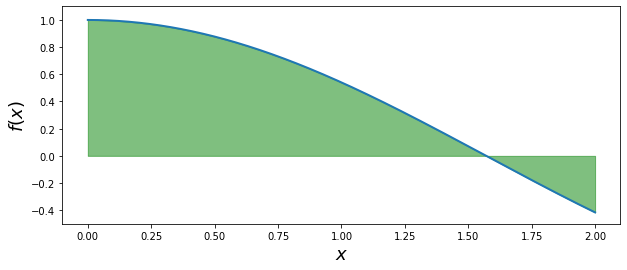

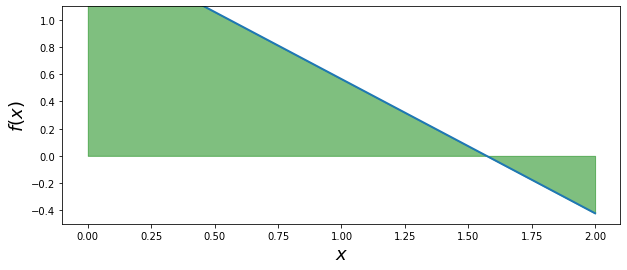

In [99]:
# get three u_average
x_vals, u_averages = get_u_average(3, 2**-6, sqrt(2), integral_average, func_u_2)
c = lower_order_polynomial_coefficient(u_averages, 2**-6)
visualize_func(func_u_2, 0, 2, -0.5, 1.1)
visualize_func(lambda x : u_averages[1] + c*(x-(x_vals[1]+x_vals[2])/2), 0, 2, -0.5, 1.1)

#### SWENO-AO for Continuous Function

In [100]:
def SWENO_AO_Recontruction(h, target, integral_average, func_u):
  # get three u_average
  x_vals, u_averages = get_u_average(3, h, target, integral_average, func_u)

  # calculate smoothness indicator for higher order 
  sigma_h = (13/12)*((u_averages[0]-2*u_averages[1]+u_averages[2])**2) + (1/4)*((u_averages[0] - u_averages[2])**2)

  # calculate coefficient for lower order 
  c = lower_order_polynomial_coefficient(u_averages, h) 
  sigma_l = (c*h) ** 2 

  # print("sigma_h: ", sigma_h)
  # print("sigma_l: ", sigma_l)
  # print("---------------")

  # calculate coefficients for weight 
  la = 1 / 100 
  s_1 = 2 
  s_2 = 1 
  epis = h ** 2 
  # epis = 10**(-6)
  tau = np.abs(sigma_h - sigma_l)

  # calculate weight 
  omega_h = 1 / (1 + la * (tau**s_1) / ((sigma_l+epis)**s_2)) 
  # print(omega_h)
  # reconstruct third order (higher order polynomial)
  P_3 = third_order_reconstruction(x_vals, u_averages, h, target)

  # reconstruct second order (lower order polynomial)
  P_2 = u_averages[1] + c * (target - (x_vals[1]+x_vals[2])/2)

  # reconstruct the whole equation 
  R = omega_h * P_3 + (1 - omega_h) * P_2 

  return R

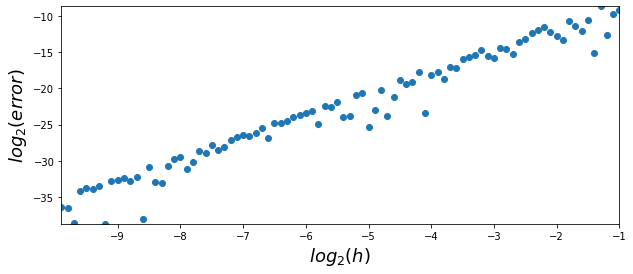

LinregressResult(slope=3.0051887760624987, intercept=-6.394753039690677, rvalue=0.9815457880915757, pvalue=5.161245384154739e-65, stderr=0.06241222507178122)

In [101]:
# h = [2**(-0.1*n) for n in range(-10,60)]
h = [2**(-0.1*n) for n in range(10,100)]
target = sqrt(8)
log_errors = []
for val in h: 
  # f(x) = cos(x)
  log_errors.append(np.log2(np.abs(SWENO_AO_Recontruction(val, target, integral_average, func_u_2) - func_u_2(target))))

log_h = [np.log2(val) for val in h]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(log_h, log_errors, 'o')
ax.set_xlabel("$log_2(h)$", fontsize=18)
ax.set_ylabel("$log_2(error)$", fontsize=18)
ax.set_ylim(min(log_errors), max(log_errors))
ax.set_xlim(min(log_h), max(log_h))
plt.show()

stats.linregress(log_h, log_errors)

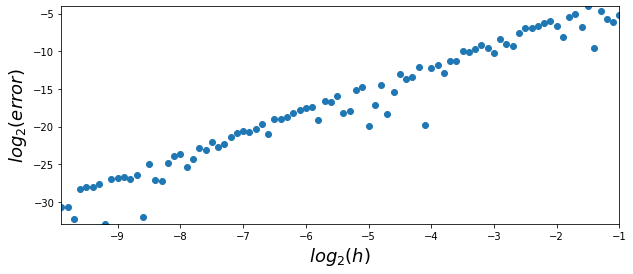

LinregressResult(slope=2.964598261030945, intercept=-0.9063293019744734, rvalue=0.9786808829850704, pvalue=2.779651298570465e-62, stderr=0.06632173727872917)

In [102]:
# h = [2**(-0.1*n) for n in range(-10,60)]
h = [2**(-0.1*n) for n in range(10,100)]
target = sqrt(8)
log_errors = []
for val in h: 
  # f(x) = e^x
  log_errors.append(np.log2(np.abs(SWENO_AO_Recontruction(val, target, integral_average, func_u_3) - func_u_3(target))))

log_h = [np.log2(val) for val in h]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(log_h, log_errors, 'o')
ax.set_xlabel("$log_2(h)$", fontsize=18)
ax.set_ylabel("$log_2(error)$", fontsize=18)
ax.set_ylim(min(log_errors), max(log_errors))
ax.set_xlim(min(log_h), max(log_h))
plt.show()

stats.linregress(log_h, log_errors)


Q: the slope is weird for function $f(x) = e^x$. All other continuous function has slope approx. $3$, whereas $e^x$ has slope close to $2$. 

#### SWENO-AO for Discontinuous Case

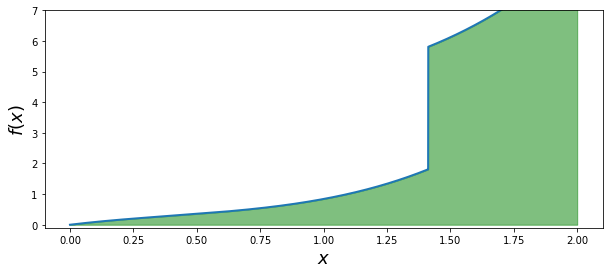

In [103]:
# override for ensuring one good glide 
def discontinuous_func_3(x): 
  val = x**3 - x**2 + np.sin(x) + (4 if (x > sqrt(2)-(2**-9)) else 0)
  return val 

def discontinuous_func_4(x): 
  val = x**3 - x**2 + np.sin(x) + (1 if (x > sqrt(2)-(2**-9)) else 0)
  return val 

def get_three_u_average_discontinuous_func(h, x_target, func, break_point):

  x = np.linspace(sqrt(2)-h,
                  sqrt(2)+(2*h),
                  num=4)

  u_averages = []
  for i in range(3):
    u_averages.append(integral_average_discontinuous_func(func, break_point, x[i], x[i+1]))

  return x, u_averages
  
visualize_discontinuous_func(discontinuous_func_3, 0, 2, -0.1, 7)

In [104]:
def SWENO_AO_Recontruction_Discontinuous(h, target, func_u, break_point):
  x_i = target
  # get three u_average
  x_vals, u_averages = get_three_u_average_discontinuous_func(h, x_i, func_u, break_point)

  # calculate smoothness indicator for higher order 
  sigma_h = (13/12)*((u_averages[0]-2*u_averages[1]+u_averages[2])**2) + (1/4)*((u_averages[0] - u_averages[2])**2)

  # calculate coefficient for lower order 
  c = lower_order_polynomial_coefficient(u_averages, h) 
  sigma_l = (c*h) ** 2 
  
  # print("h-value: ", h)
  # print("sigma_h: ", sigma_h)
  # print("sigma_l: ", sigma_l)
  # print("---------------")

  # calculate coefficients for weight 
  la = 1 / 100
  s_1 = 2 
  s_2 = 1 
  epis = h ** 2 
  # epis = 10**(-6)
  tau = np.abs(sigma_h - sigma_l)

  # calculate weight 
  omega_h = 1 / (1 + la * (tau**s_1) / ((sigma_l+epis)**s_2))
  # print(omega_h)
  # reconstruct third order (higher order polynomial)
  P_3 = third_order_reconstruction(x_vals, u_averages, h, target)

  # reconstruct second order (lower order polynomial)
  P_2 = u_averages[1] + c * (x_i - (x_vals[1]+x_vals[2])/2.0)

  # reconstruct the whole equation 
  R = omega_h * P_3 + (1 - omega_h) * P_2 

  return R

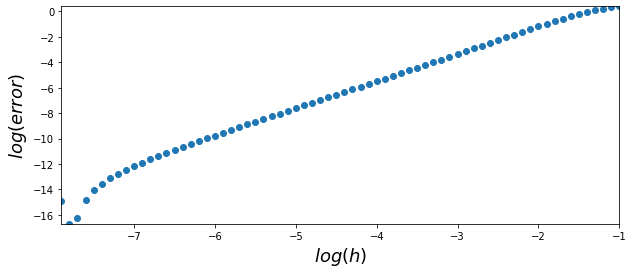

LinregressResult(slope=2.2637596581714017, intercept=3.4219634650633193, rvalue=0.9940627544879355, pvalue=3.017248598190136e-67, stderr=0.03004858133141748)

In [105]:
# h = [2**(-0.1*n) for n in range(91, 100)]
h = [2**(-0.1*n) for n in range(10, 80)]
# h = [2**(-0.1*n) for n in range(10, 40)]

target = sqrt(2)+(2**-9)
log_errors = []
for val in h: 
  log_errors.append(np.log2(np.abs(SWENO_AO_Recontruction_Discontinuous(val, target, discontinuous_func_3, sqrt(2)-(2**-9)) - discontinuous_func_3(target))))

log_h = [np.log2(val) for val in h]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(log_h, log_errors, 'o')
ax.set_xlabel("$log(h)$", fontsize=18)
ax.set_ylabel("$log(error)$", fontsize=18)
ax.set_ylim(min(log_errors), max(log_errors))
ax.set_xlim(min(log_h), max(log_h))
plt.show()

stats.linregress(log_h, log_errors)

In [106]:
# # h = [2**(-0.1*n) for n in range(91, 100)]
# h = [2**(-0.1*n) for n in range(30, 80)]
# # h = [2**(-0.1*n) for n in range(10, 40)]

# target = sqrt(2)+(2**-9)
# sigma_llll = []
# for val in h: 
#   sigma_llll.append(np.log2(np.abs(SWENO_AO_Recontruction_Discontinuous(val, target, discontinuous_func_3, sqrt(2)-(2**-9)))))

# log_h = [np.log2(val) for val in h]

# fig, ax = plt.subplots(figsize=(10, 4))
# ax.plot(log_h, sigma_llll, 'o')
# ax.set_xlabel("$log(h)$", fontsize=18)
# ax.set_ylabel("$log(\sigma^l)$", fontsize=18)
# ax.set_ylim(min(sigma_llll), max(sigma_llll))
# ax.set_xlim(min(log_h), max(log_h))
# plt.show()

# stats.linregress(log_h, sigma_llll)

### Part D SWENO-AO(5,2) Reconstruction
Here we investigate the SWENO-AO(5, 2)  
Our higher order reconstruction polynomial $p^h$ is based on large stencil with three cells.  
The lower order $p^l$ is calculated by two cells with order 2.  
Our reconstruction function looks like 
$$ p^{AO}_S(x) = \omega^h p^h(x)+(1-\omega^h)p^l(x)$$  
where 
$$\omega^h = 1/[1+\lambda \frac{\tau^{s_1}}{(\sigma^l+\epsilon)^{s_2}}], \quad \tau = |\sigma^h-\sigma^l|$$  
where $\sigma$ represents the smoothness indicator:
$$ \sigma^l = (ch)^2$$  
$$\sigma^h=\left(u_{51}+\frac{u_{53}}{10}\right)^{2}+\frac{13}{3}\left(u_{52}+\frac{123}{455} u_{54}\right)^{2}+\frac{781}{20}\left(u_{53}\right)^{2}+\frac{1421461}{2275}\left(u_{54}\right)^{2}$$ where
$$ 
\begin{aligned} 
u_{51} &=\frac{1}{120}\left(11 f_{i-2}-82 f_{i-1}+82 f_{i+1}-11 f_{i+2}\right) \\
u_{52} &=\frac{1}{56}\left(-3 f_{i-2}+40 f_{i-1}-74 f_{i}+40 f_{i+1}-3 f_{i+2}\right) \\
u_{53} &=\frac{1}{12}\left(-f_{i-2}+2 f_{i-1}-2 f_{i+1}+f_{i+2}\right) \\
u_{54} &=\frac{1}{24}\left(f_{i+2}-4 f_{i-1}+6 f_{i}-4 f_{i+1}+f_{i+2}\right)
\end{aligned}
$$   
where $c$ is the coefficient in the $p^l$ defined as 
$$ p^l = \bar{u}_{center} + c(x-x_{center}) $$ 
The other coefficients are given as following in Huang's paper: 
$$ \lambda = \frac{1}{100}, (s_1, s_2) = (2,1), \epsilon=h^2$$

#### Continuous Function

In [107]:
def fifth_order_reconstruction(x_vals, u_averages, h, x_i):
  A = []
  for i in range(5):
    a_1 = h 
    a_2 = h * (x_vals[i+1]+x_vals[i]) / 2
    a_3 = (x_vals[i+1]**3 - x_vals[i]**3) / 3
    a_4 = (x_vals[i+1]**4 - x_vals[i]**4) / 4
    a_5 = (x_vals[i+1]**5 - x_vals[i]**5) / 5
    A.append([a_1, a_2, a_3, a_4, a_5])

  U = [u*h for u in u_averages]

  C = linalg.solve(np.array(A), np.array(U))
  
  return C[0] + C[1]*x_i + C[2]*(x_i**2) + C[3]*(x_i**3) + C[4]*(x_i**4)

In [108]:
def SWENO_AO_Recontruction_52(h, x_i, integral_average, func_u):
  # x_i = target
  # get five u_average
  x_vals, u_averages = get_u_average(5, h, x_i, integral_average, func_u)

  # calculate fifth order sigma 
  u_51 = (11*u_averages[0] - 82*u_averages[1] + 82*u_averages[3] - 11*u_averages[4]) / 120
  u_52 = (-3*u_averages[0] + 40*u_averages[1] - 74*u_averages[2] + 40*u_averages[3] -  3*u_averages[4]) / 56
  u_53 = (  -u_averages[0] +  2*u_averages[1] -  2*u_averages[3] +    u_averages[4]) / 12
  u_54 = (   u_averages[0] -  4*u_averages[1] +  6*u_averages[2] -  4*u_averages[3] +   u_averages[4]) / 24

  # get sigma^5 as higher order smoothness indicator 
  sigma_h = (u_51+(u_53/10))**2 + (13/3)*((u_52+123*u_54/455)**2) + (781/20)*(u_53**2) + (1421461/2275)*(u_54**2)

  # recontruct higher order polynomial
  P_5 = fifth_order_reconstruction(x_vals, u_averages, h, x_i)

  # calculate coefficient for lower order 
  c = lower_order_polynomial_coefficient(u_averages[1:4], h) 
  sigma_l = (c*h) ** 2 

  # calculate coefficients for weight 
  la = 1 / 100
  s_1 = 2 
  s_2 = 1 
  epis = h ** 2 
  # epis = 10**(-6) 

  tau = np.abs(sigma_h - sigma_l)

  # calculate weight 
  omega_h = 1 / (1 + la * (tau**s_1) / ((sigma_l+epis)**s_2))

  # reconstruct second order (lower order polynomial)
  P_2 = u_averages[2] + c * (x_i - (x_vals[2]+x_vals[3])/2.0)

  # reconstruct the whole equation 
  R = omega_h * P_5 + (1 - omega_h) * P_2 

  return R

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: LinAlgWarning: Ill-conditioned matrix (rcond=3.8668e-17): result may not be accurate.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: LinAlgWarning: Ill-conditioned matrix (rcond=4.16886e-17): result may not be accurate.
  del sys.path[0]


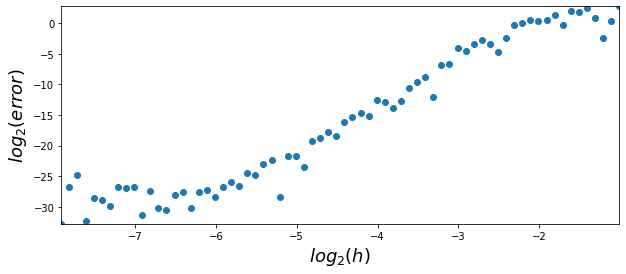

LinregressResult(slope=5.585341114217892, intercept=9.198460535461722, rvalue=0.9671582528570069, pvalue=3.525272855364257e-42, stderr=0.17800429431672798)

In [216]:
# h = [2**(-0.1*n) for n in range(-10,60)]
h = [2**(-0.1*n-0.01) for n in range(10,80)]
target = sqrt(40)
log_errors = []
for val in h: 
  # f(x) = cos(x)
  log_errors.append(np.log2(np.abs(SWENO_AO_Recontruction_52(val, target, integral_average, func_u_3) - func_u_3(target))))

log_h = [np.log2(val) for val in h]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(log_h, log_errors, 'o')
ax.set_xlabel("$log_2(h)$", fontsize=18)
ax.set_ylabel("$log_2(error)$", fontsize=18)
ax.set_ylim(min(log_errors), max(log_errors))
ax.set_xlim(min(log_h), max(log_h))
plt.show()

stats.linregress(log_h, log_errors)

In [129]:
stats.linregress(log_h, log_errors)[0]

2.463630273936348

#### Discontinuous Function

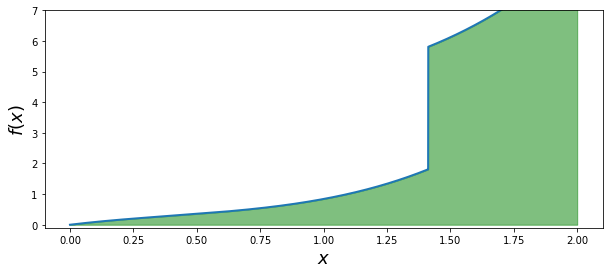

In [110]:
# override for ensuring one good glide 
def discontinuous_func_3(x): 
  val = x**3 - x**2 + np.sin(x) + (4 if (x > sqrt(2)-(2**-9)) else 0)
  return val 

def discontinuous_func_4(x): 
  val = x**3 - x**2 + np.sin(x) + (1 if (x > sqrt(2)-(2**-9)) else 0)
  return val 

def get_five_u_average_discontinuous_func(h, x_target, func, break_point):

  x = np.linspace(sqrt(2)-2*h,
                  sqrt(2)+(3*h),
                  num=6)

  u_averages = []
  for i in range(5):
    u_averages.append(integral_average_discontinuous_func(func, break_point, x[i], x[i+1]))

  return x, u_averages
  
visualize_discontinuous_func(discontinuous_func_3, 0, 2, -0.1, 7)

In [111]:
def SWENO_AO_Recontruction_52_Discontinuous(h, target, func_u, break_point):
  x_i = target 
  # get five u_average
  x_vals, u_averages = get_five_u_average_discontinuous_func(h, x_i, func_u, break_point)

  # calculate fifth order sigma 
  u_51 = (11*u_averages[0] - 82*u_averages[1] + 82*u_averages[3] - 11*u_averages[4]) / 120
  u_52 = (-3*u_averages[0] + 40*u_averages[1] - 74*u_averages[2] + 40*u_averages[3] -  3*u_averages[4]) / 56
  u_53 = (  -u_averages[0] +  2*u_averages[1] -  2*u_averages[3] +    u_averages[4]) / 12
  u_54 = (   u_averages[0] -  4*u_averages[1] +  6*u_averages[2] -  4*u_averages[3] +   u_averages[4]) / 24

  # get sigma^5 as higher order smoothness indicator 
  sigma_h = (u_51+(u_53/10))**2 + (13/3)*((u_52+123*u_54/455)**2) + (781/20)*(u_53**2) + (1421461/2275)*(u_54**2)

  # recontruct higher order polynomial
  P_5 = fifth_order_reconstruction(x_vals, u_averages, h, x_i)

  # calculate coefficient for lower order 
  c = lower_order_polynomial_coefficient(u_averages[1:4], h) 
  sigma_l = (c*h) ** 2 

  # calculate coefficients for weight 
  la = 1 / 100
  s_1 = 2 
  s_2 = 1 
  epis = h ** 2 
  # epis = 10**(-6)
  tau = np.abs(sigma_h - sigma_l)

  # calculate weight 
  omega_h = 1 / (1 + la * (tau**s_1) / ((sigma_l+epis)**s_2))
  # print(omega_h)
  # reconstruct second order (lower order polynomial)
  P_2 = u_averages[2] + c * (x_i - (x_vals[2]+x_vals[3])/2.0)

  # reconstruct the whole equation 
  R = omega_h * P_5 + (1 - omega_h) * P_2 

  return R

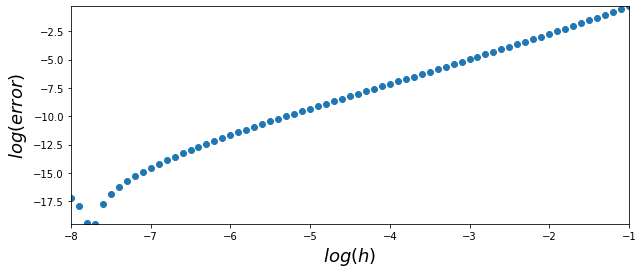

LinregressResult(slope=2.463630273936348, intercept=2.495975836876129, rvalue=0.9918168850096313, pvalue=2.0146863491263066e-63, stderr=0.03817715147255749)

In [112]:
# h = [2**(-0.1*n) for n in range(91, 100)]
h = [2**(-0.1*n) for n in range(10, 81)]
# h = [2**(-0.1*n) for n in range(10, 40)]

target = sqrt(2)+(2**-9)
log_errors = []
for val in h: 
  log_errors.append(np.log2(np.abs(SWENO_AO_Recontruction_52_Discontinuous(val, target, discontinuous_func_3, sqrt(2)-(2**-9)) - discontinuous_func_3(target))))

log_h = [np.log2(val) for val in h]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(log_h, log_errors, 'o')
ax.set_xlabel("$log(h)$", fontsize=18)
ax.set_ylabel("$log(error)$", fontsize=18)
ax.set_ylim(min(log_errors), max(log_errors))
ax.set_xlim(min(log_h), max(log_h))
plt.show()

stats.linregress(log_h, log_errors)

### Testing & Visualization

#### Helper Functions

In [113]:
def SWENO_AO_Recontruction_52_Discontinuous_parameterized(h, target, func_u, break_point, s1, s2, ep):
  x_i = target
  # get five u_average
  x_vals, u_averages = get_five_u_average_discontinuous_func(h, x_i, func_u, break_point)

  # calculate fifth order sigma 
  u_51 = (11*u_averages[0] - 82*u_averages[1] + 82*u_averages[3] - 11*u_averages[4]) / 120
  u_52 = (-3*u_averages[0] + 40*u_averages[1] - 74*u_averages[2] + 40*u_averages[3] -  3*u_averages[4]) / 56
  u_53 = (  -u_averages[0] +  2*u_averages[1] -  2*u_averages[3] +    u_averages[4]) / 12
  u_54 = (   u_averages[0] -  4*u_averages[1] +  6*u_averages[2] -  4*u_averages[3] +   u_averages[4]) / 24

  # get sigma^5 as higher order smoothness indicator 
  sigma_h = (u_51+(u_53/10))**2 + (13/3)*((u_52+123*u_54/455)**2) + (781/20)*(u_53**2) + (1421461/2275)*(u_54**2)

  # recontruct higher order polynomial
  P_5 = fifth_order_reconstruction(x_vals, u_averages, h, x_i)

  # calculate coefficient for lower order 
  c = lower_order_polynomial_coefficient(u_averages[1:4], h) 
  sigma_l = (c*h) ** 2 

  # calculate coefficients for weight 
  la = 1 / 100
  s_1 = s1 
  s_2 = s2 
  epis = ep
  tau = np.abs(sigma_h - sigma_l)

  # calculate weight 
  omega_h = 1 / (1 + la * (tau**s_1) / ((sigma_l+epis)**s_2))
  # print(omega_h)
  # reconstruct second order (lower order polynomial)
  P_2 = u_averages[2] + c * (target - (x_vals[2]+x_vals[3])/2.0)

  # reconstruct the whole equation 
  R = omega_h * P_5 + (1 - omega_h) * P_2 

  return R

In [114]:
def SWENO_AO_Recontruction_52_Continuous_parameterized(h, target, func_u, break_point, s1, s2, ep):
  x_i = target
  # get five u_average
  x_vals, u_averages = get_u_average(5, h, x_i, integral_average, func_u)

  # calculate fifth order sigma 
  u_51 = (11*u_averages[0] - 82*u_averages[1] + 82*u_averages[3] - 11*u_averages[4]) / 120
  u_52 = (-3*u_averages[0] + 40*u_averages[1] - 74*u_averages[2] + 40*u_averages[3] -  3*u_averages[4]) / 56
  u_53 = (  -u_averages[0] +  2*u_averages[1] -  2*u_averages[3] +    u_averages[4]) / 12
  u_54 = (   u_averages[0] -  4*u_averages[1] +  6*u_averages[2] -  4*u_averages[3] +   u_averages[4]) / 24

  # get sigma^5 as higher order smoothness indicator 
  sigma_h = (u_51+(u_53/10))**2 + (13/3)*((u_52+123*u_54/455)**2) + (781/20)*(u_53**2) + (1421461/2275)*(u_54**2)

  # recontruct higher order polynomial
  P_5 = fifth_order_reconstruction(x_vals, u_averages, h, x_i)

  # calculate coefficient for lower order 
  c = lower_order_polynomial_coefficient(u_averages[1:4], h) 
  sigma_l = (c*h) ** 2 

  # calculate coefficients for weight 
  la = 1 / 100
  s_1 = s1 
  s_2 = s2
  epis = ep

  tau = np.abs(sigma_h - sigma_l)

  # calculate weight 
  omega_h = 1 / (1 + la * (tau**s_1) / ((sigma_l+epis)**s_2))

  # reconstruct second order (lower order polynomial)
  P_2 = u_averages[2] + c * (target - (x_vals[2]+x_vals[3])/2.0)

  # reconstruct the whole equation 
  R = omega_h * P_5 + (1 - omega_h) * P_2 

  return R

In [170]:
def visualize_reconstruct_error(reconstruct_func, target_func, t):
  h_values = [2**(-n-0.1) for n in range(1, 10)]

  target = t

  cols = ['s1', 
          's2', 
          'log2_h', 
          'log2_error']

  data = []
  candidates_s = np.linspace(0.0, 3.0, num=20)
  s1_values = list(candidates_s)
  s2_values = list(candidates_s)
  # s1_values = [0, 0.1, 0.5, 1, 1.01, 1.4, 2, 2.5, 3]
  # s2_values = [0, 0.1, 0.5, 1, 1.01, 1.4, 2, 2.5, 3]
  for s2 in s2_values:
    for s1 in s1_values:
      for h in h_values:
        row = [s1, s2] 
        row.append(np.log2(h))
        log_error = np.log2(np.abs(reconstruct_func(
                h, target, target_func, sqrt(2)-(2**-9), s1, s2, h**2) - 
                  target_func(target)))
        row.append(log_error)
        data.append(row)

  df = pd.DataFrame(data=data, columns=cols)
  
  fig1 = plt.figure(figsize=(10, 8), dpi=80)
  ax1 = fig1.add_subplot(111, projection='3d')
  ax1.set_xlabel('s1 values')
  ax1.set_ylabel('s2 values')
  ax1.set_zlabel('$log_2(h)$ values')

  img1 = ax1.scatter(df['s1'], df['s2'], df['log2_h'], c=df['log2_error'], cmap=plt.get_cmap('inferno'))
  cbar1 = fig1.colorbar(img1)
  cbar1.set_label('$log_2(error)$ values')

  plt.show() 

  # choose different h values for showing s_1 s_2 vs error
  fig2, axes = plt.subplots(figsize=(24, 20), dpi=80, nrows = 3, ncols = 3, sharex = True, sharey = True)
  for i in range(0, 9):
    threeD_data = df[df['log2_h'] == -(i+1.1)]
    img3 = axes[i//3][i%3].scatter(threeD_data['s1'], threeD_data['s2'], c=threeD_data['log2_error'], cmap=plt.get_cmap('inferno'))
    valid_s2 = [0, 1, 2, 3]
    valid_s1 = [(4+v-1)/3 for v in valid_s2]
    axes[i//3][i%3].plot(valid_s1, valid_s2, c= "red", marker='.', linestyle=':')
    axes[i//3][i%3].set_xlabel('$log_2(H)$='+str(-(i+1.1)))
    # plt.xlabel('s1 values')
    # plt.ylabel('s2 values')
    fig2.colorbar(img3, ax=axes[i//3][i%3])

  plt.show()

In [116]:
def visualize_reconstruct_error_set_epislon(reconstruct_func, target_func, t):
  h_values = [2**(-n-0.1) for n in range(0, 10)]

  target = t

  cols = ['s1', 
          's2', 
          'log2_h', 
          'log2_error']

  data = []
  s1_values = [0, 0.1, 0.5, 1, 1.01, 1.4, 2, 2.5, 3]
  s2_values = [0, 0.1, 0.5, 1, 1.01, 1.4, 2, 2.5, 3]
  for s2 in s2_values:
    for s1 in s1_values:
      for h in h_values:
        row = [s1, s2] 
        row.append(np.log2(h))
        log_error = np.log2(np.abs(reconstruct_func(
                h, target, target_func, sqrt(2)-(2**-9), s1, s2, 10**-3) - 
                  target_func(target)))
        row.append(log_error)
        data.append(row)

  df = pd.DataFrame(data=data, columns=cols)
  
  fig1 = plt.figure(figsize=(10, 8), dpi=80)
  ax1 = fig1.add_subplot(111, projection='3d')
  ax1.set_xlabel('s1 values')
  ax1.set_ylabel('s2 values')
  ax1.set_zlabel('$log_2(h)$ values')

  img1 = ax1.scatter(df['s1'], df['s2'], df['log2_h'], c=df['log2_error'], cmap=plt.get_cmap('inferno'))
  cbar1 = fig1.colorbar(img1)
  cbar1.set_label('$log_2(error)$ values')

  plt.show() 

  # choose different h values for showing s_1 s_2 vs error
  fig2, axes = plt.subplots(figsize=(24, 20), dpi=80, nrows = 3, ncols = 3, sharex = True, sharey = True)
  for i in range(0, 9):
    threeD_data = df[df['log2_h'] == -(i+1.1)]
    img3 = axes[i//3][i%3].scatter(threeD_data['s1'], threeD_data['s2'], c=threeD_data['log2_error'], cmap=plt.get_cmap('inferno'))
    valid_s2 = [1, 1.01, 1.4, 2, 2.5, 3]
    valid_s1 = [(4+v-1)/3 for v in valid_s2]
    axes[i//3][i%3].plot(valid_s1, valid_s2, c= "red", marker='.', linestyle=':')
    axes[i//3][i%3].set_xlabel('$log_2(h)$='+str(-(i+1.1)))
    # plt.ylabel('s1 values')
    fig2.colorbar(img3, ax=axes[i//3][i%3])

  plt.show()

In [117]:
def visualize_WENO_AO_Reconstruction_error(reconstruct_func, target_func, t, continuous_or_not):
  h = [2**(-0.1*n) for n in range(10, 91)]

  target = t
  log_errors = []
  for val in h: 
    if continuous_or_not: 
      log_errors.append(np.log2(np.abs(reconstruct_func(val, target, integral_average, target_func) - target_func(target))))
    else:
      log_errors.append(np.log2(np.abs(reconstruct_func(val, target, target_func, sqrt(2)-(2**-9)) - target_func(target))))
  
  log_h = [np.log2(val) for val in h]

  fig, ax = plt.subplots(figsize=(10, 4))
  ax.plot(log_h, log_errors, 'o')
  ax.set_xlabel("$log(h)$", fontsize=18)
  ax.set_ylabel("$log(error)$", fontsize=18)
  ax.set_ylim(min(log_errors), max(log_errors))
  ax.set_xlim(min(log_h), max(log_h))
  plt.show()

  stats.linregress(log_h, log_errors)

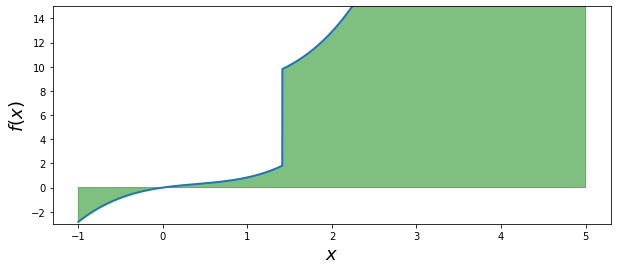

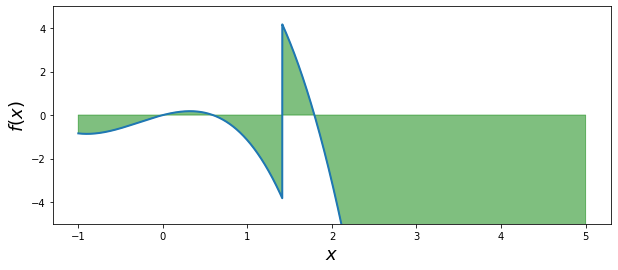

In [118]:
def discontinuous_func_a(x): 
  val = x**3 - x**2 + np.sin(x) + (2 if (x > sqrt(2)-(2**-9)) else 0)
  return val 

def discontinuous_func_b(x): 
  val = x**3 - x**2 + np.sin(x) + (8 if (x > sqrt(2)-(2**-9)) else 0)
  return val 

def discontinuous_func_c(x): 
  val = - x**3 - x**2 + np.sin(x) + (8 if (x > sqrt(2)-(2**-9)) else 0)
  return val 

def discontinuous_func_d(x): 
  val = - x**3 + x**2 + np.sin(x) + (8 if (x > sqrt(2)-(2**-9)) else 0)
  return val 

visualize_discontinuous_func(discontinuous_func_b, -1, 5, -3, 15)
visualize_discontinuous_func(discontinuous_func_c, -1, 5, -5, 5)

#### Playground

In [119]:
import pandas as pd 

from prettytable import PrettyTable
h = [2**(-0.1*n) for n in range(10, 75)]

target = sqrt(2)+(2**-9)

cols = ['Parameters', 
        'Average log_error for func a', 
        'Average log_error for func b', 
        'Average log_error for func c',
        'Average log_error for func d',
        'Average WENO-AO log_error for func b']

data = []

for s2 in range(1, 7):
  lower_bound = math.ceil((4+s2-1)/3)
  for s1 in range(lower_bound, lower_bound+3):
    row = ['s1: {}, s2: {}'.format(s1, s2),]
    log_errors_a = []
    log_errors_b = []
    log_errors_c = []
    log_errors_d = []
    WENO_log_errors = []
    for val in h: 
      log_errors_a.append(np.log2(
          np.abs(SWENO_AO_Recontruction_52_Discontinuous_parameterized(
              val, target, discontinuous_func_a, sqrt(2)-(2**-9), s1, s2, val**2) - 
                discontinuous_func_a(target))))
      log_errors_b.append(np.log2(
          np.abs(SWENO_AO_Recontruction_52_Discontinuous_parameterized(
              val, target, discontinuous_func_b, sqrt(2)-(2**-9), s1, s2, val**2) - 
                discontinuous_func_b(target))))
      log_errors_c.append(np.log2(
          np.abs(SWENO_AO_Recontruction_52_Discontinuous_parameterized(
              val, target, discontinuous_func_c, sqrt(2)-(2**-9), s1, s2, val**2) - 
                discontinuous_func_c(target))))
      log_errors_d.append(np.log2(
          np.abs(SWENO_AO_Recontruction_52_Discontinuous_parameterized(
              val, target, discontinuous_func_d, sqrt(2)-(2**-9), s1, s2, val**2) - 
                discontinuous_func_d(target))))
      WENO_log_errors.append(np.log2(
          np.abs(WENO_AO_Recontruction_Discontinuous(
              val, target, discontinuous_func_b, sqrt(2)-(2**-9)) - 
              discontinuous_func_b(target))))
    row.append(sum(log_errors_a)/len(log_errors_a))
    row.append(sum(log_errors_b)/len(log_errors_b))
    row.append(sum(log_errors_c)/len(log_errors_c))
    row.append(sum(log_errors_d)/len(log_errors_d))
    row.append(sum(WENO_log_errors)/len(WENO_log_errors))
    data.append(row)

print("Comparing SWENO-AO(5,2) and WENO-AO(5,3) on Discontinuous functions")
df = pd.DataFrame(data=data, columns=cols)
df

Comparing SWENO-AO(5,2) and WENO-AO(5,3) on Discontinuous functions


Parameters  ...  Average WENO-AO log_error for func b
0   s1: 2, s2: 1  ...                            -12.588395
1   s1: 3, s2: 1  ...                            -12.588395
2   s1: 4, s2: 1  ...                            -12.588395
3   s1: 2, s2: 2  ...                            -12.588395
4   s1: 3, s2: 2  ...                            -12.588395
5   s1: 4, s2: 2  ...                            -12.588395
6   s1: 2, s2: 3  ...                            -12.588395
7   s1: 3, s2: 3  ...                            -12.588395
8   s1: 4, s2: 3  ...                            -12.588395
9   s1: 3, s2: 4  ...                            -12.588395
10  s1: 4, s2: 4  ...                            -12.588395
11  s1: 5, s2: 4  ...                            -12.588395
12  s1: 3, s2: 5  ...                            -12.588395
13  s1: 4, s2: 5  ...                            -12.588395
14  s1: 5, s2: 5  ...                            -12.588395
15  s1: 3, s2: 6  ...                            -12.588395
16  s1: 4, s2: 6  ...                            -12.588395
17  s1: 5, s2: 6  ...                            -12.588395

[18 rows x 6 columns]

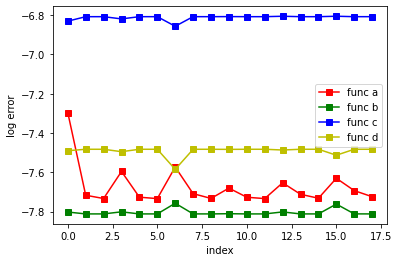

In [61]:
x = list(df.index)
plt.plot(x,df[cols[1]],'s-',color = 'r',label="func a")
plt.plot(x,df[cols[2]],'s-',color = 'g',label="func b")
plt.plot(x,df[cols[3]],'s-',color = 'b',label="func c")
plt.plot(x,df[cols[4]],'s-',color = 'y',label="func d")
# plt.plot(x,df[cols[4]],'o-',color = 'r',label="func b - WENO-AO")
plt.xlabel("index")
plt.ylabel("log error")
plt.legend(loc = "best")
plt.show()

$$
f(x)=\left\{\begin{array}{lll}
x^3 - x^2 + sin(x) + 2 &\text{if} &x > \sqrt{2}-(2^{-9}) \\
x^3 - x^2 + sin(x) &\text{else}
\end{array}\right.
$$

In [62]:
h_values = [2**(-n) for n in range(0, 10)]

target = sqrt(2)+(2**-9)

cols = ['s1', 
        's2', 
        'log2_h', 
        'log2_error']

data = []
s1_values = [0, 0.1, 0.5, 1, 1.01, 1.4, 2, 2.5, 3]
s2_values = [0, 0.1, 0.5, 1, 1.01, 1.4, 2, 2.5, 3]
for s2 in s2_values:
  for s1 in s1_values:
    for h in h_values:
      row = [s1, s2] 
      row.append(np.log2(h))
      log_error = np.log2(np.abs(SWENO_AO_Recontruction_52_Discontinuous_parameterized(
              h, target, discontinuous_func_a, sqrt(2)-(2**-9), s1, s2, h**2) - 
                discontinuous_func_a(target)))
      row.append(log_error)
      data.append(row)

df = pd.DataFrame(data=data, columns=cols)
df

s1   s2  log2_h  log2_error
0    0.0  0.0     0.0   -0.336759
1    0.0  0.0    -1.0   -0.346473
2    0.0  0.0    -2.0   -0.379159
3    0.0  0.0    -3.0   -0.428249
4    0.0  0.0    -4.0   -0.524390
..   ...  ...     ...         ...
805  3.0  3.0    -5.0   -9.369672
806  3.0  3.0    -6.0  -11.728673
807  3.0  3.0    -7.0  -14.654157
808  3.0  3.0    -8.0  -18.123190
809  3.0  3.0    -9.0  -19.102244

[810 rows x 4 columns]

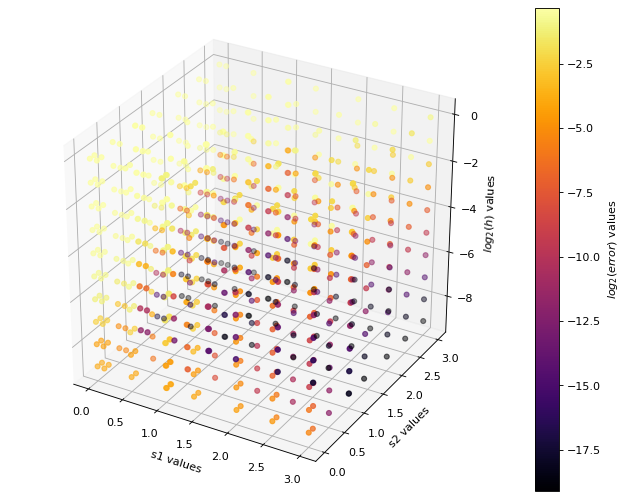

In [63]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('s1 values')
ax.set_ylabel('s2 values')
ax.set_zlabel('$log_2(h)$ values')

img = ax.scatter(df['s1'], df['s2'], df['log2_h'], c=df['log2_error'], cmap=plt.get_cmap('inferno'))
cbar = fig.colorbar(img)
cbar.set_label('$log_2(error)$ values')

plt.show()

In [64]:
threeD_data = df[df['log2_h'] == -7]
threeD_data['error'] = np.where(threeD_data['log2_error'] < -8, 1, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


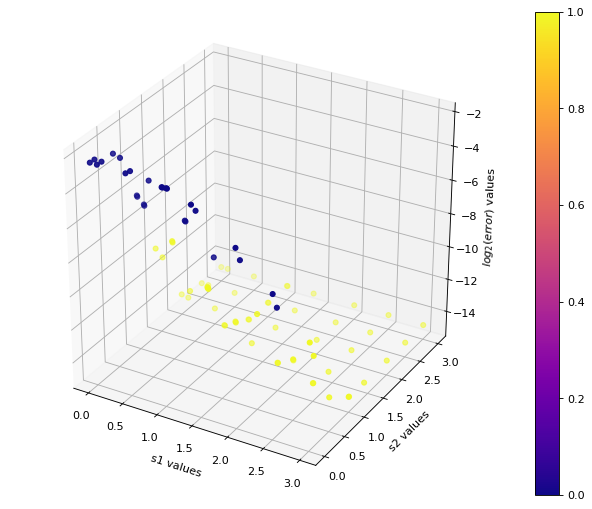

In [65]:
fig = plt.figure(figsize=(10, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('s1 values')
ax.set_ylabel('s2 values')
ax.set_zlabel('$log_2(error)$ values')

img = ax.scatter(threeD_data['s1'], threeD_data['s2'], threeD_data['log2_error'], c=threeD_data['error'], cmap=plt.get_cmap('plasma'))
cbar = fig.colorbar(img)

plt.show()

In [66]:
threeD_data = df[df['log2_h'] == -4]
threeD_data['error'] = np.where(threeD_data['log2_error'] < -8, 1, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


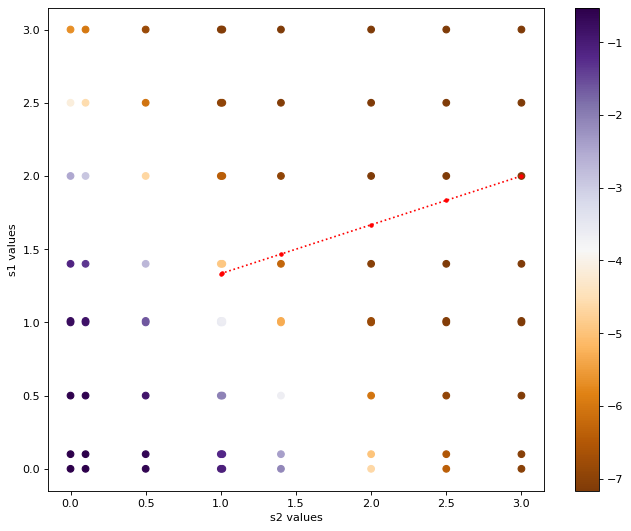

In [67]:
fig = plt.figure(figsize=(10, 8), dpi=80)
img3 = plt.scatter(threeD_data['s1'], threeD_data['s2'], c=threeD_data['log2_error'], cmap=plt.get_cmap('PuOr'))
valid_s2 = [1, 1.01, 1.4, 2, 2.5, 3]
valid_s1 = [(4+v-1)/3 for v in valid_s2]
plt.plot(valid_s2, valid_s1, c= "red", marker='.', linestyle=':')
plt.xlabel('s2 values')
plt.ylabel('s1 values')
cbar = fig.colorbar(img3)

plt.show()

#### Visualizaiton of Error for discontinuous function
visualize $log_2(error)$ versus different $s_1, s_2, log_2(h)$ values

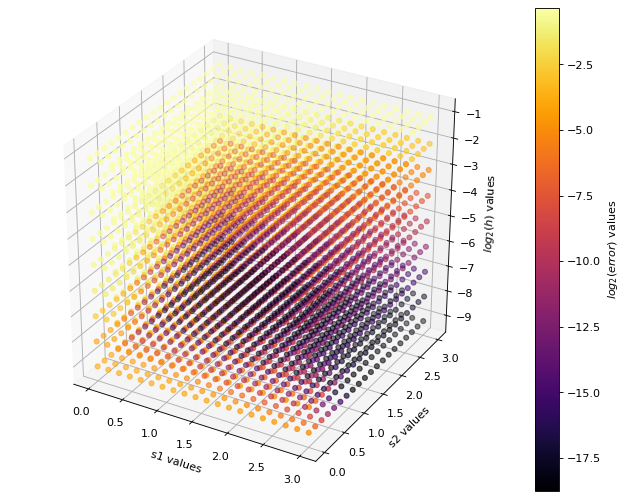

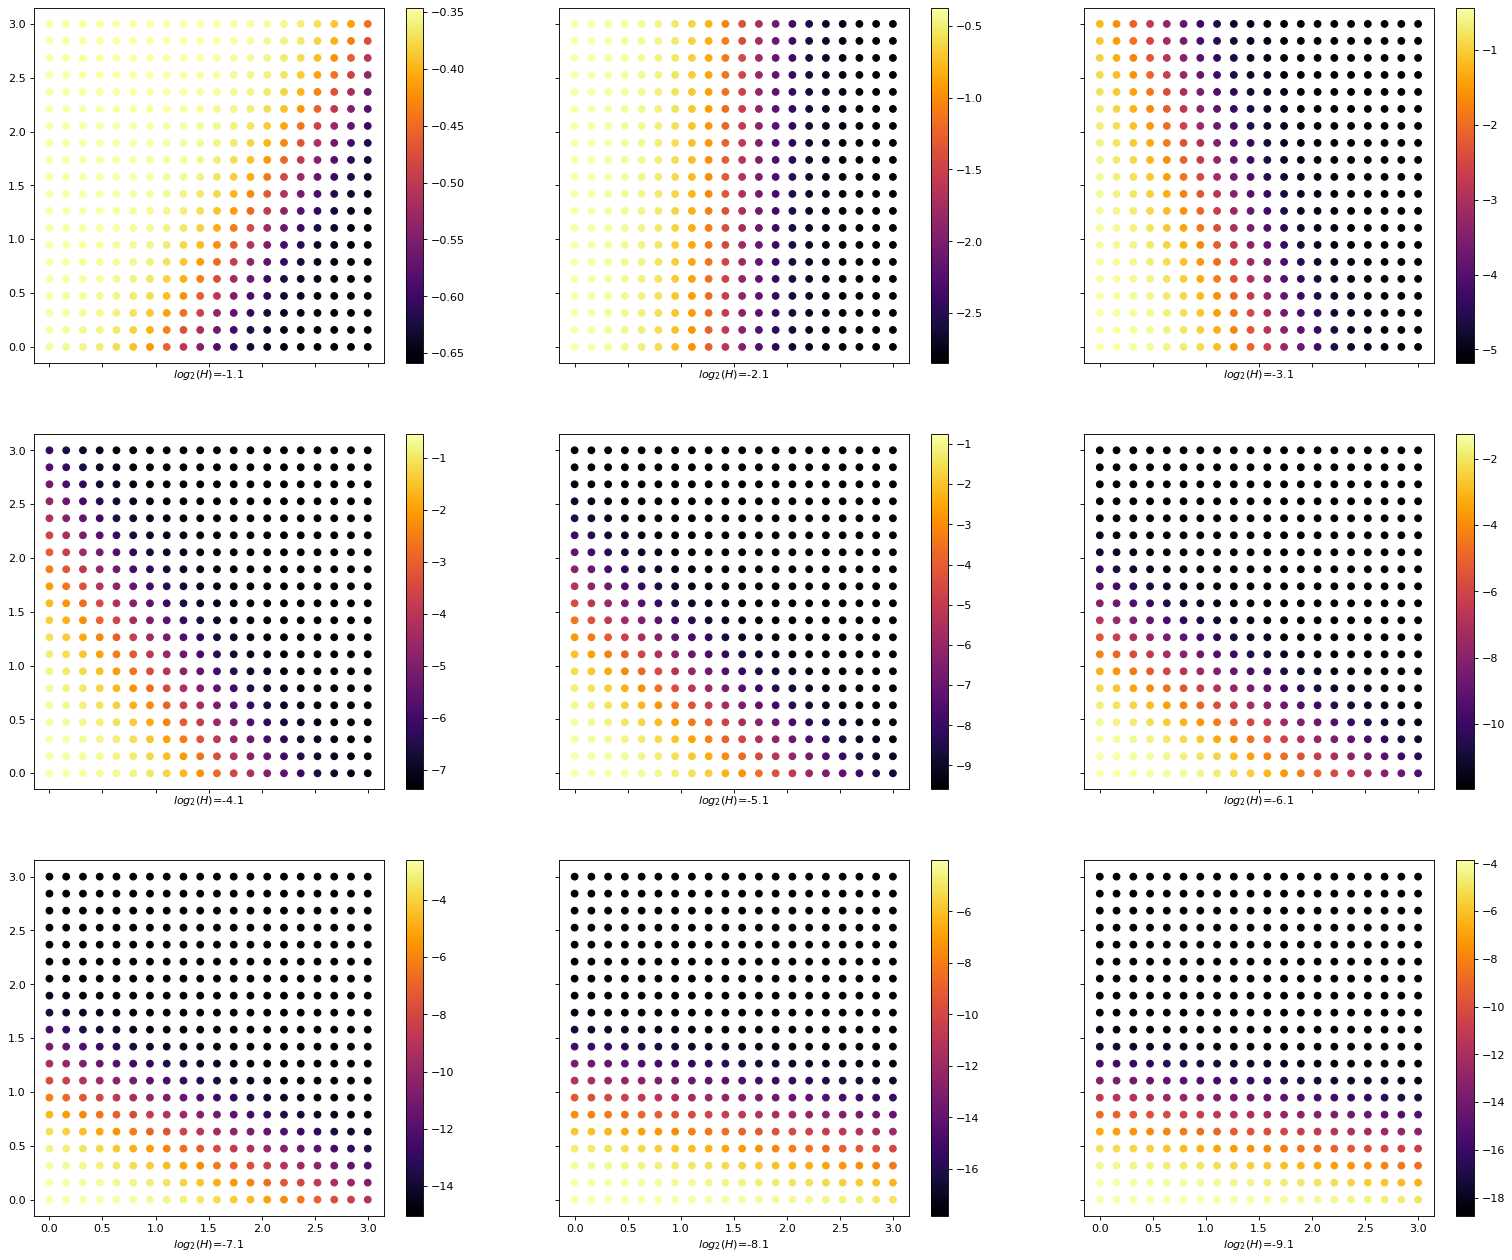

In [168]:
visualize_reconstruct_error(SWENO_AO_Recontruction_52_Discontinuous_parameterized, discontinuous_func_a, sqrt(2)+(2**-9))

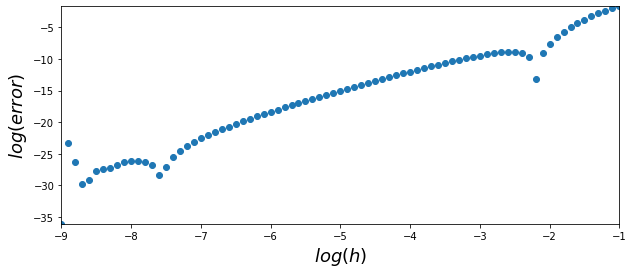

In [123]:
visualize_WENO_AO_Reconstruction_error(WENO_AO_Recontruction_Discontinuous, discontinuous_func_a, sqrt(2)+(2**-9), False)

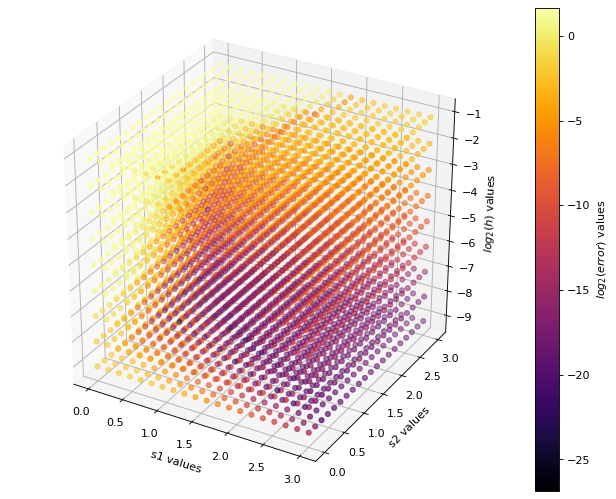

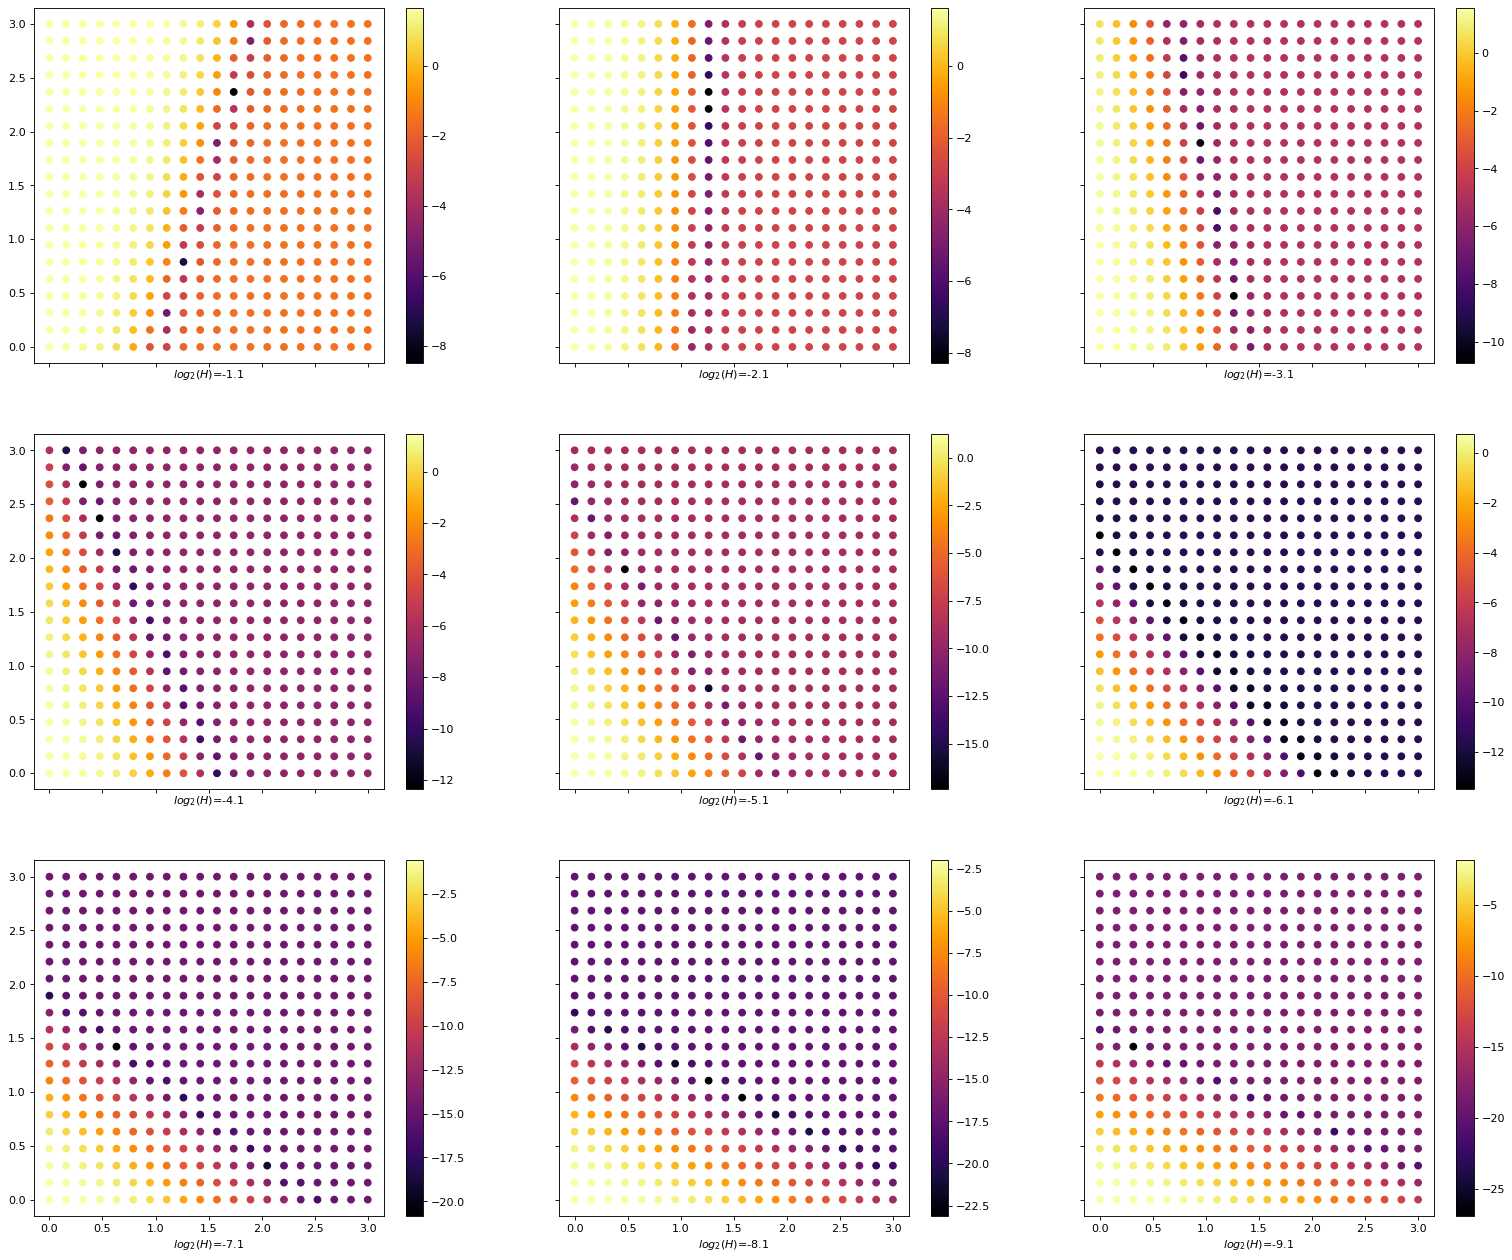

In [124]:
visualize_reconstruct_error(SWENO_AO_Recontruction_52_Discontinuous_parameterized, discontinuous_func_d, sqrt(2)+(2**-9))

[0.0006728012243630729, 0.011592099458453232, 0.01684119900737791, 0.9708939003098057]
[0.0004087151794646197, 0.006314859691667505, 0.011133553927927359, 0.9821428712009405]
[0.0002494470742121358, 0.0035043124800091174, 0.00730568757596091, 0.9889405528698177]
[0.00015338563936981945, 0.00198276713300736, 0.004778027300094994, 0.9930858199275279]
[9.519249773284372e-05, 0.001144000098187409, 0.003124057668399292, 0.9956367497356804]
[5.968959554247495e-05, 0.0006728683185165024, 0.002046764307360744, 0.9972206777785803]
[3.783874418783844e-05, 0.0004032132191194476, 0.0013460029864695367, 0.9982129450502232]
[2.425700833791908e-05, 0.00024599243297492176, 0.0008896354401417136, 0.9988401151185454]
[1.5725852804416765e-05, 0.0001526614308843973, 0.0005915182560174876, 0.9992400944602937]
[1.0308649013283864e-05, 9.628731930841914e-05, 0.0003959022769711701, 0.9994975017547072]
[6.830837253786671e-06, 6.166484004194636e-05, 0.0002668332669781423, 0.9996646710557262]
[4.57362347802661e-

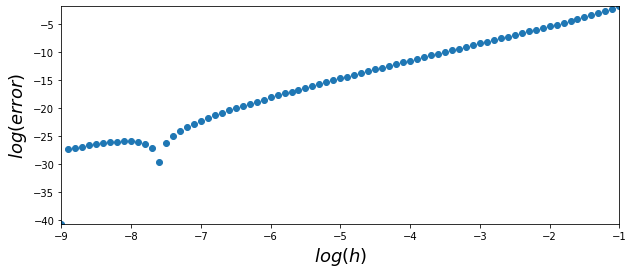

In [71]:
visualize_WENO_AO_Reconstruction_error(WENO_AO_Recontruction_Discontinuous, discontinuous_func_d, sqrt(2)+(2**-9), False)

#### Visualizing Error for Continuous Function

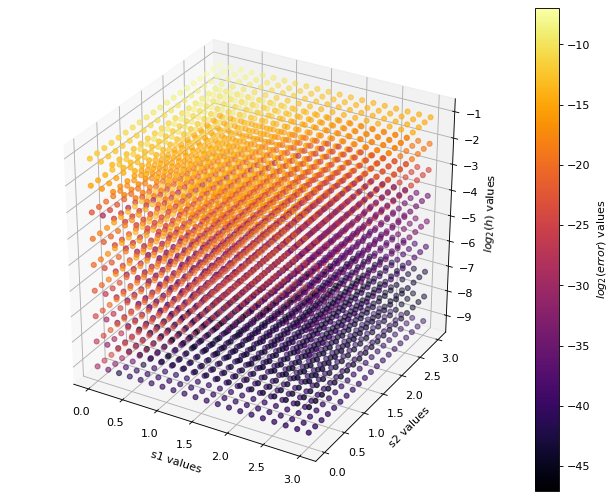

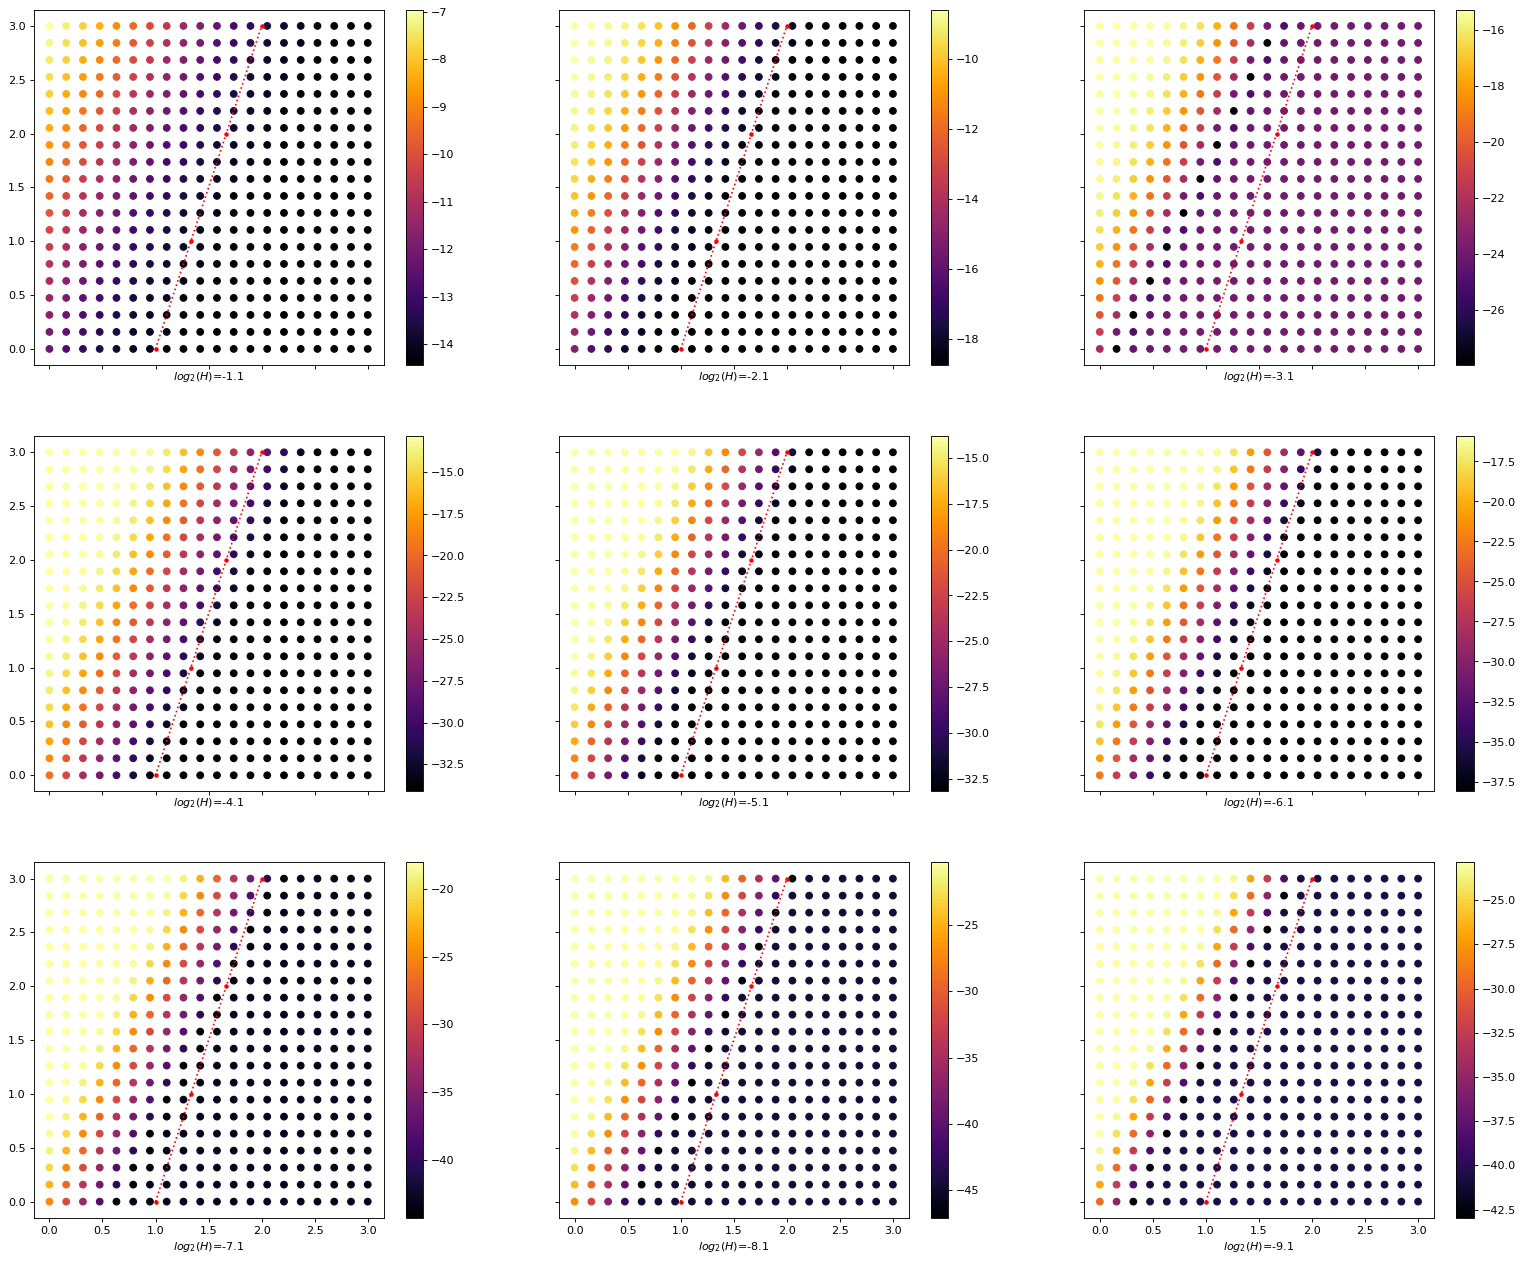

In [171]:
visualize_reconstruct_error(SWENO_AO_Recontruction_52_Continuous_parameterized, func_u_2, sqrt(8))

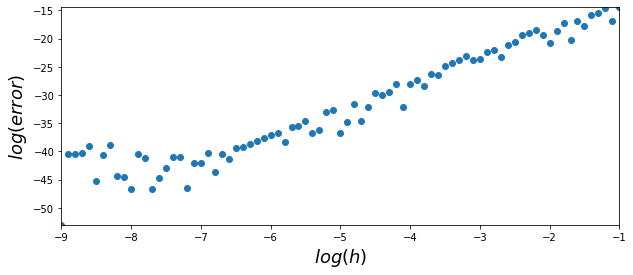

In [73]:
visualize_WENO_AO_Reconstruction_error(WENO_AO_Recontruction, func_u_2, sqrt(8), True)

#### Error compare for different $\epsilon$
$h^2$ approximates to $10^{-6}$ when $h=2^{-9}$ 

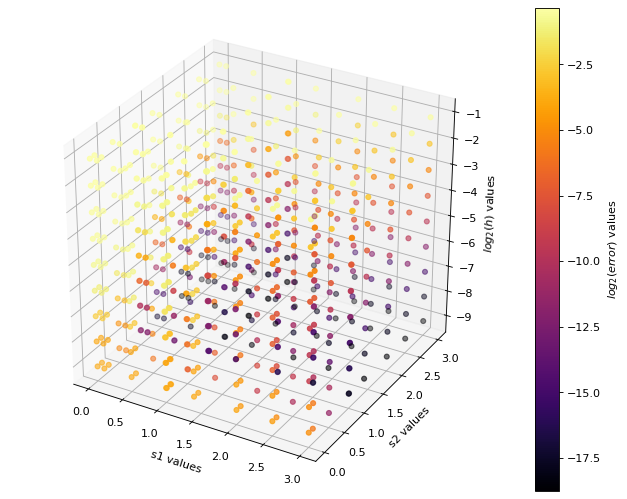

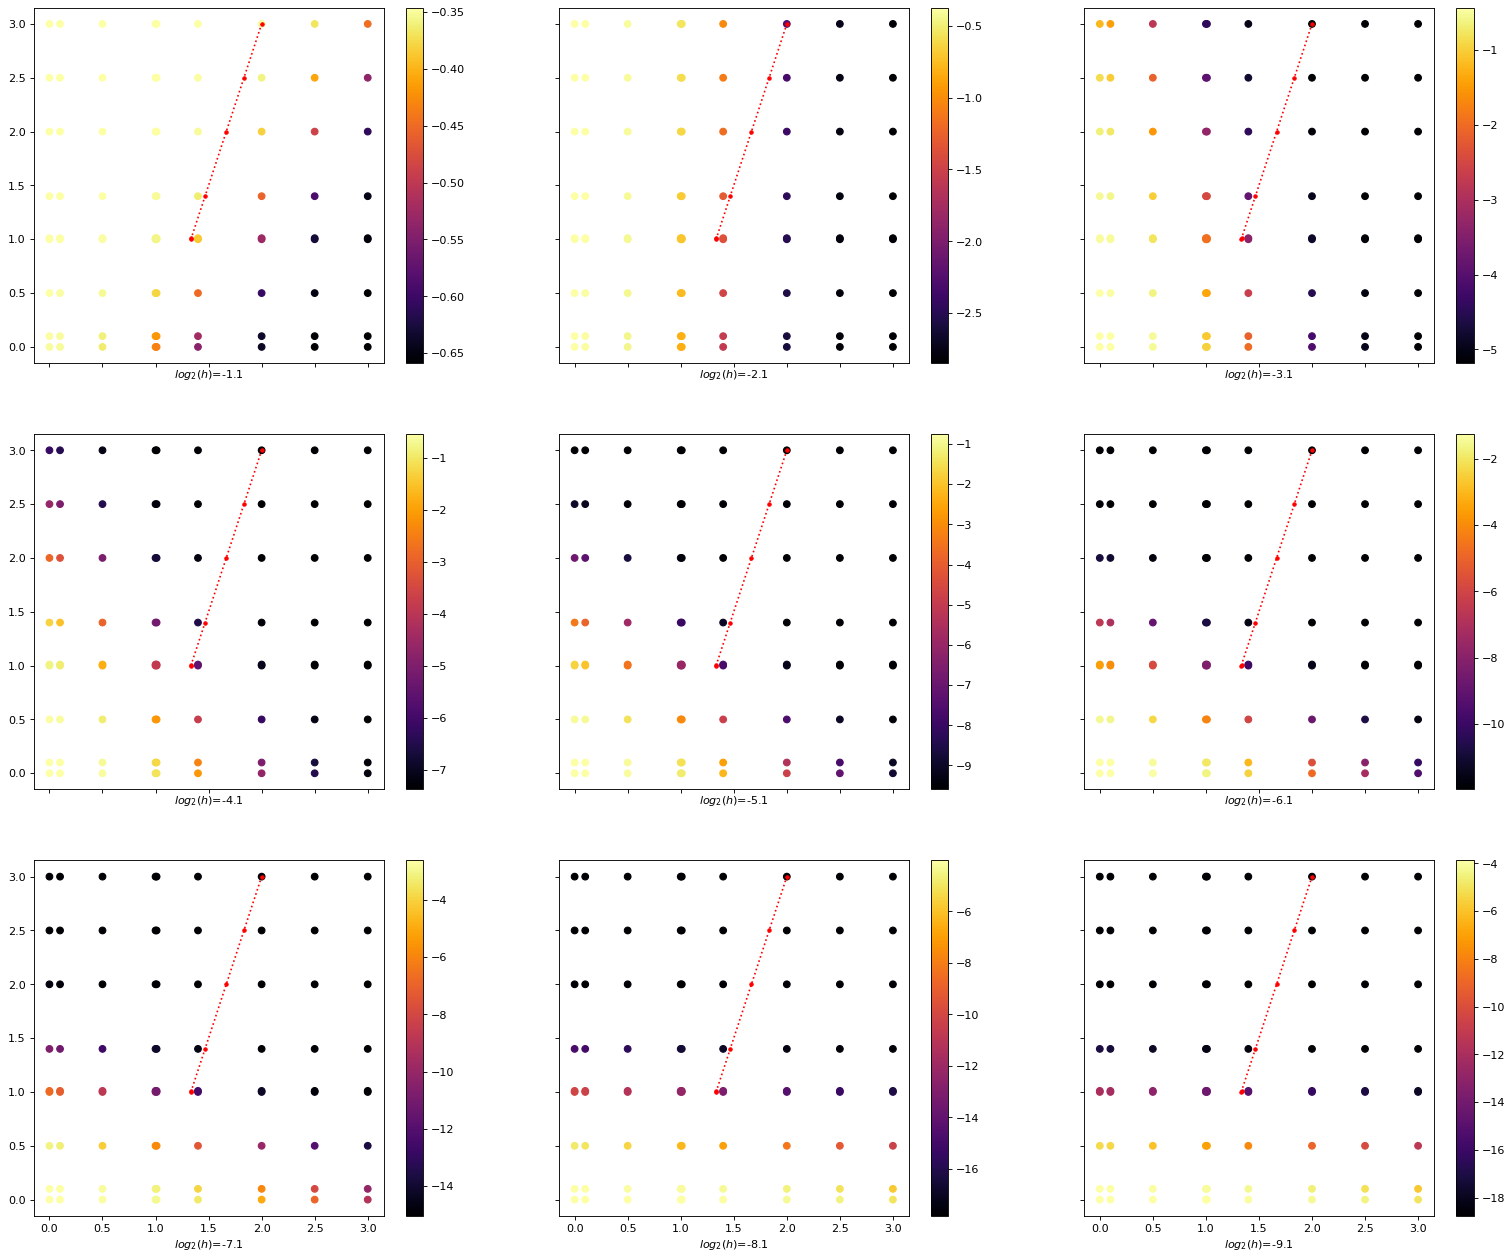

In [74]:
visualize_reconstruct_error(SWENO_AO_Recontruction_52_Discontinuous_parameterized, discontinuous_func_a, sqrt(2)+(2**-9))

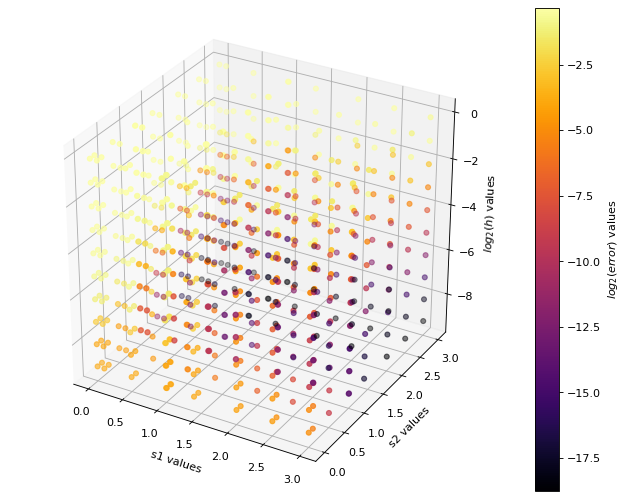

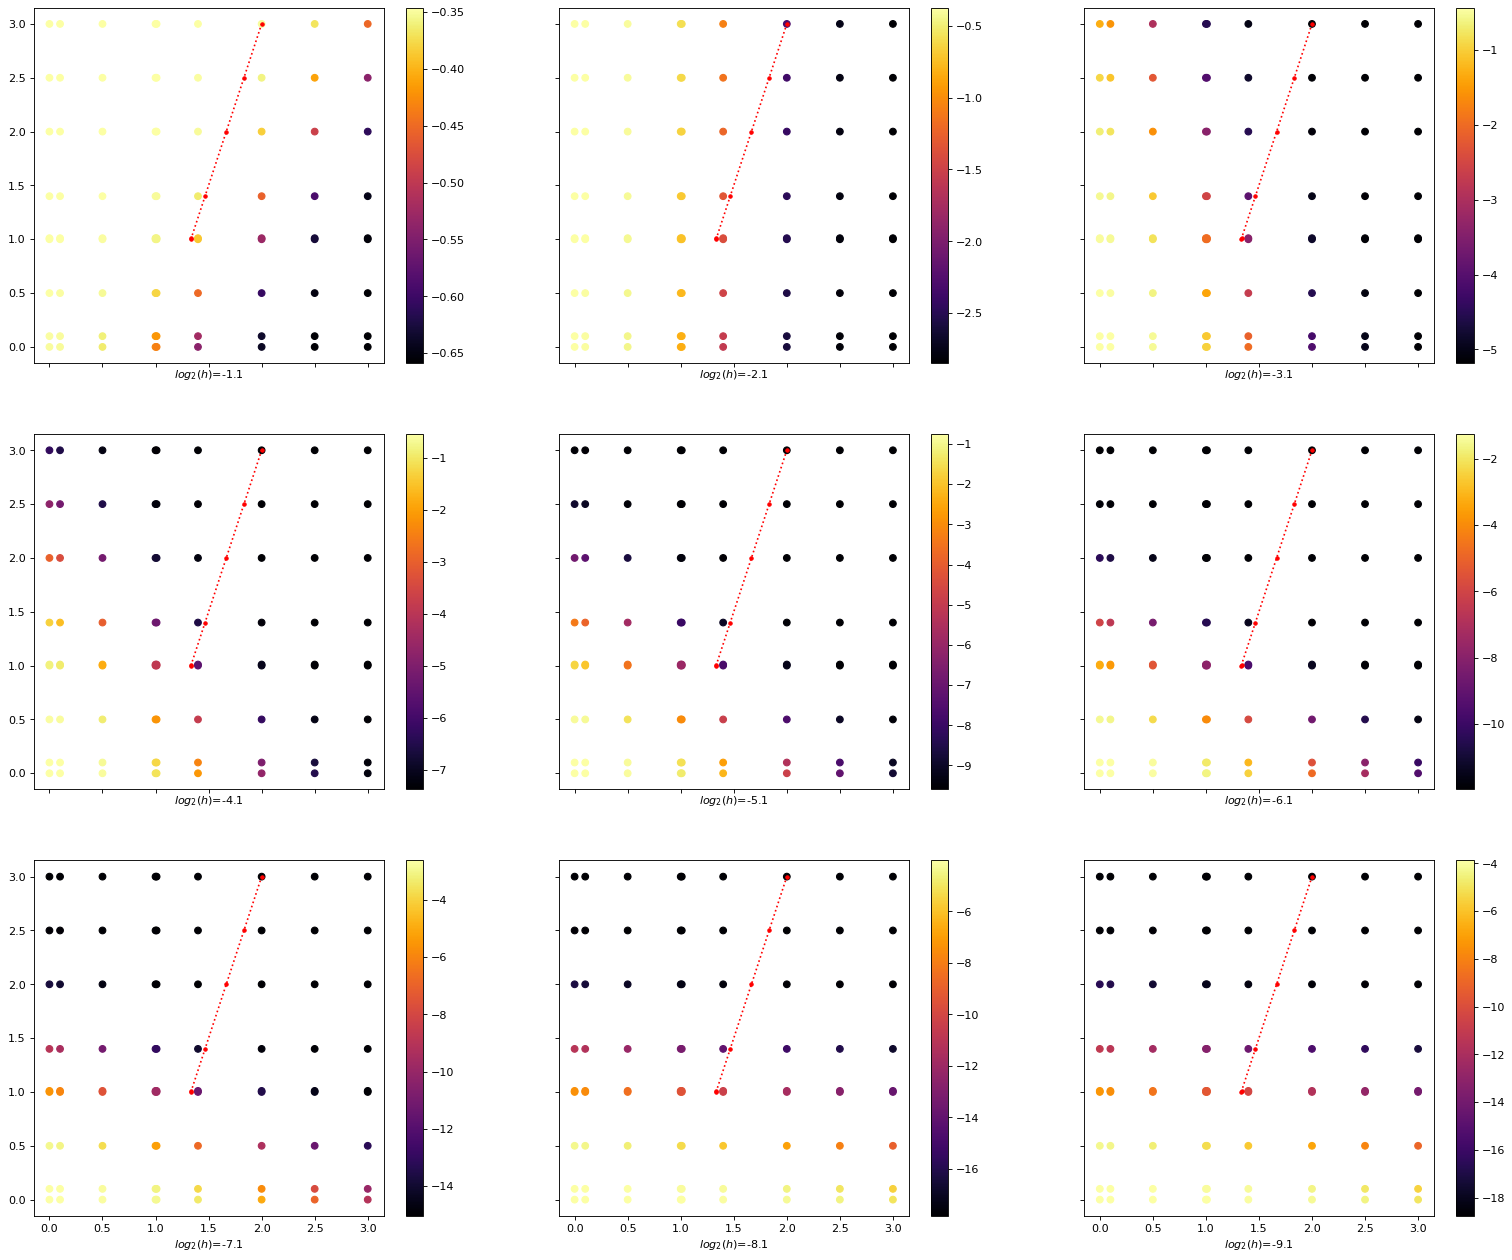

In [75]:
visualize_reconstruct_error_set_epislon(SWENO_AO_Recontruction_52_Discontinuous_parameterized, discontinuous_func_a, sqrt(2)+(2**-9))

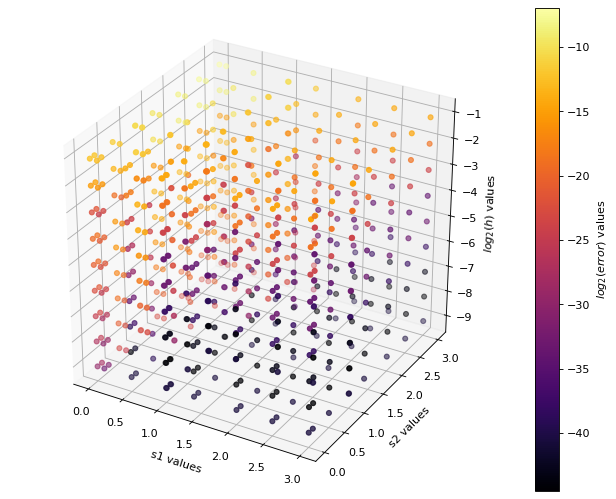

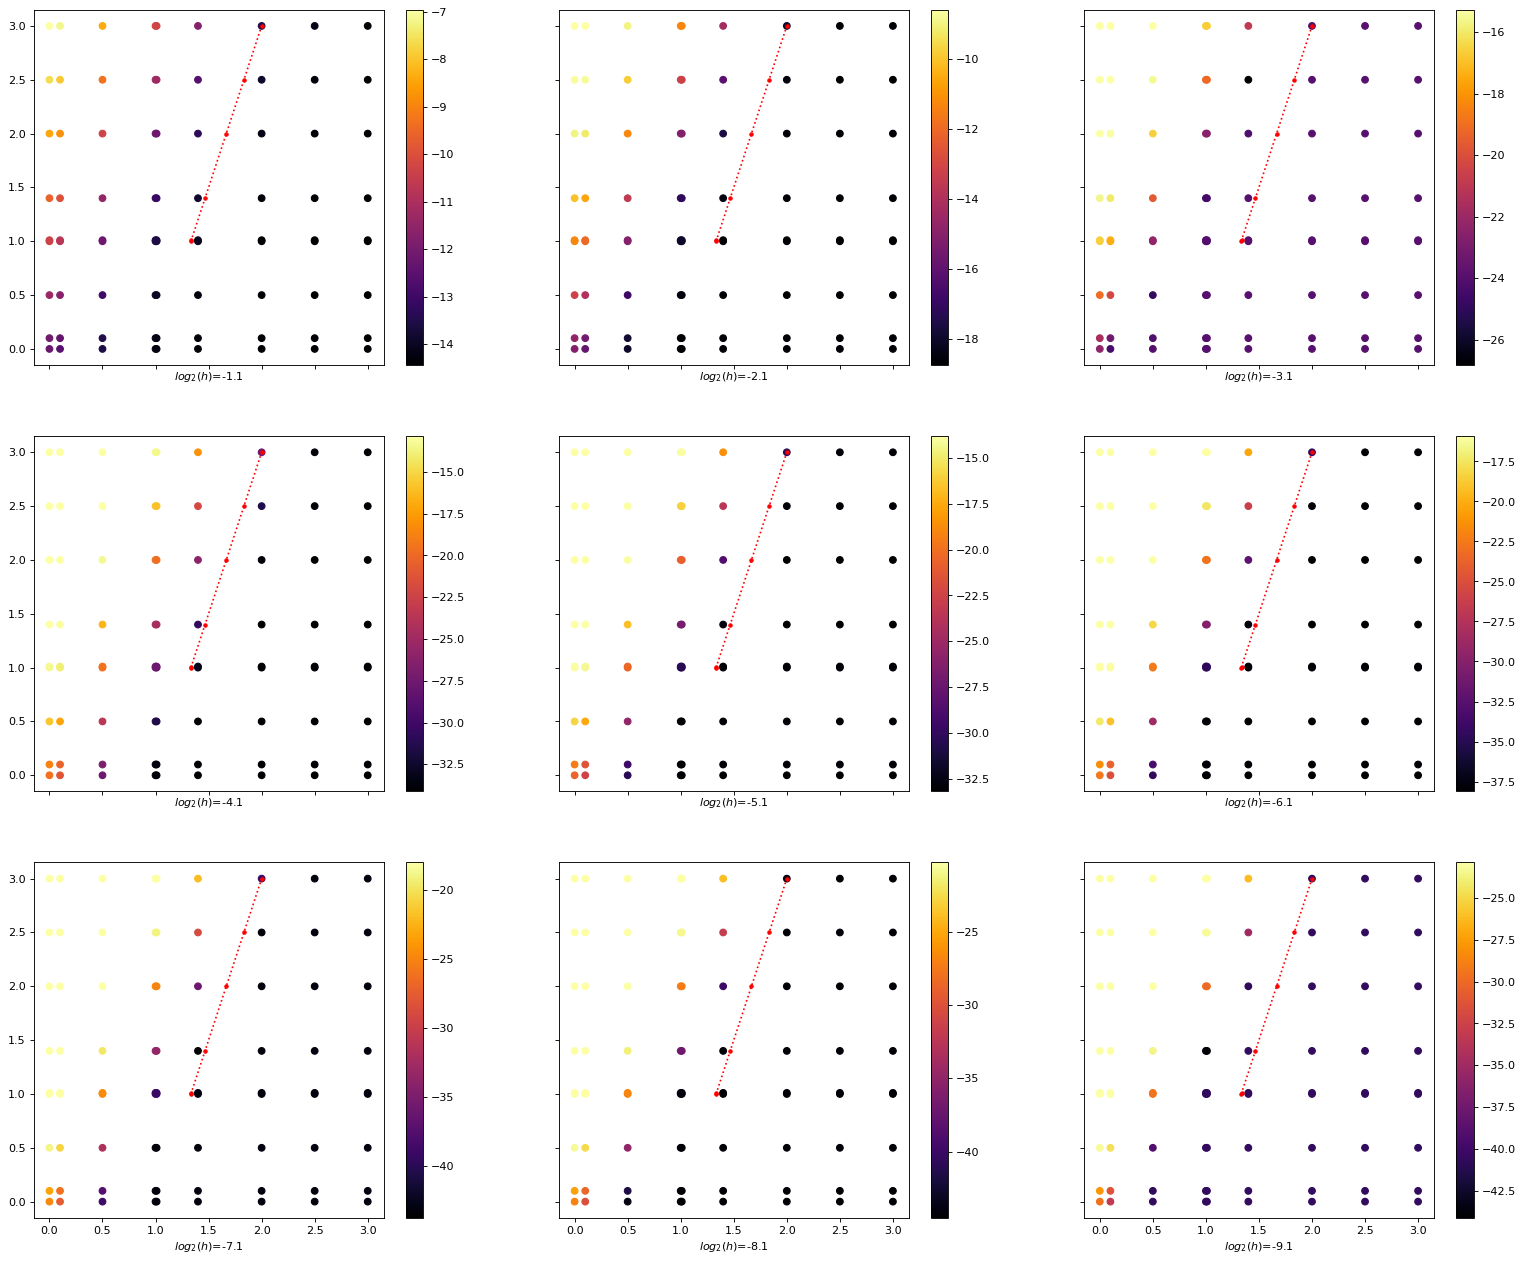

In [76]:
visualize_reconstruct_error(SWENO_AO_Recontruction_52_Continuous_parameterized, func_u_2, sqrt(8))

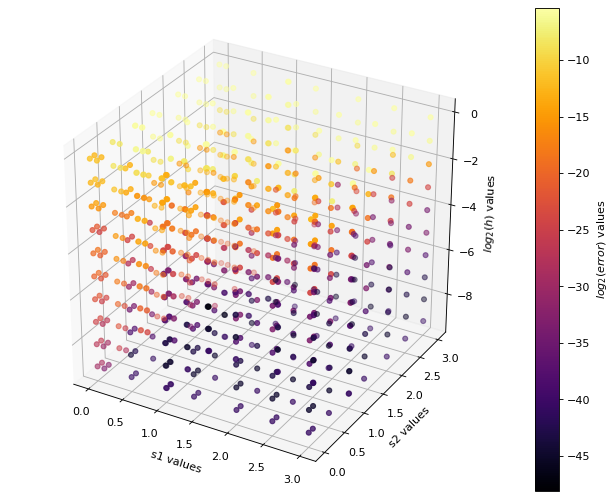

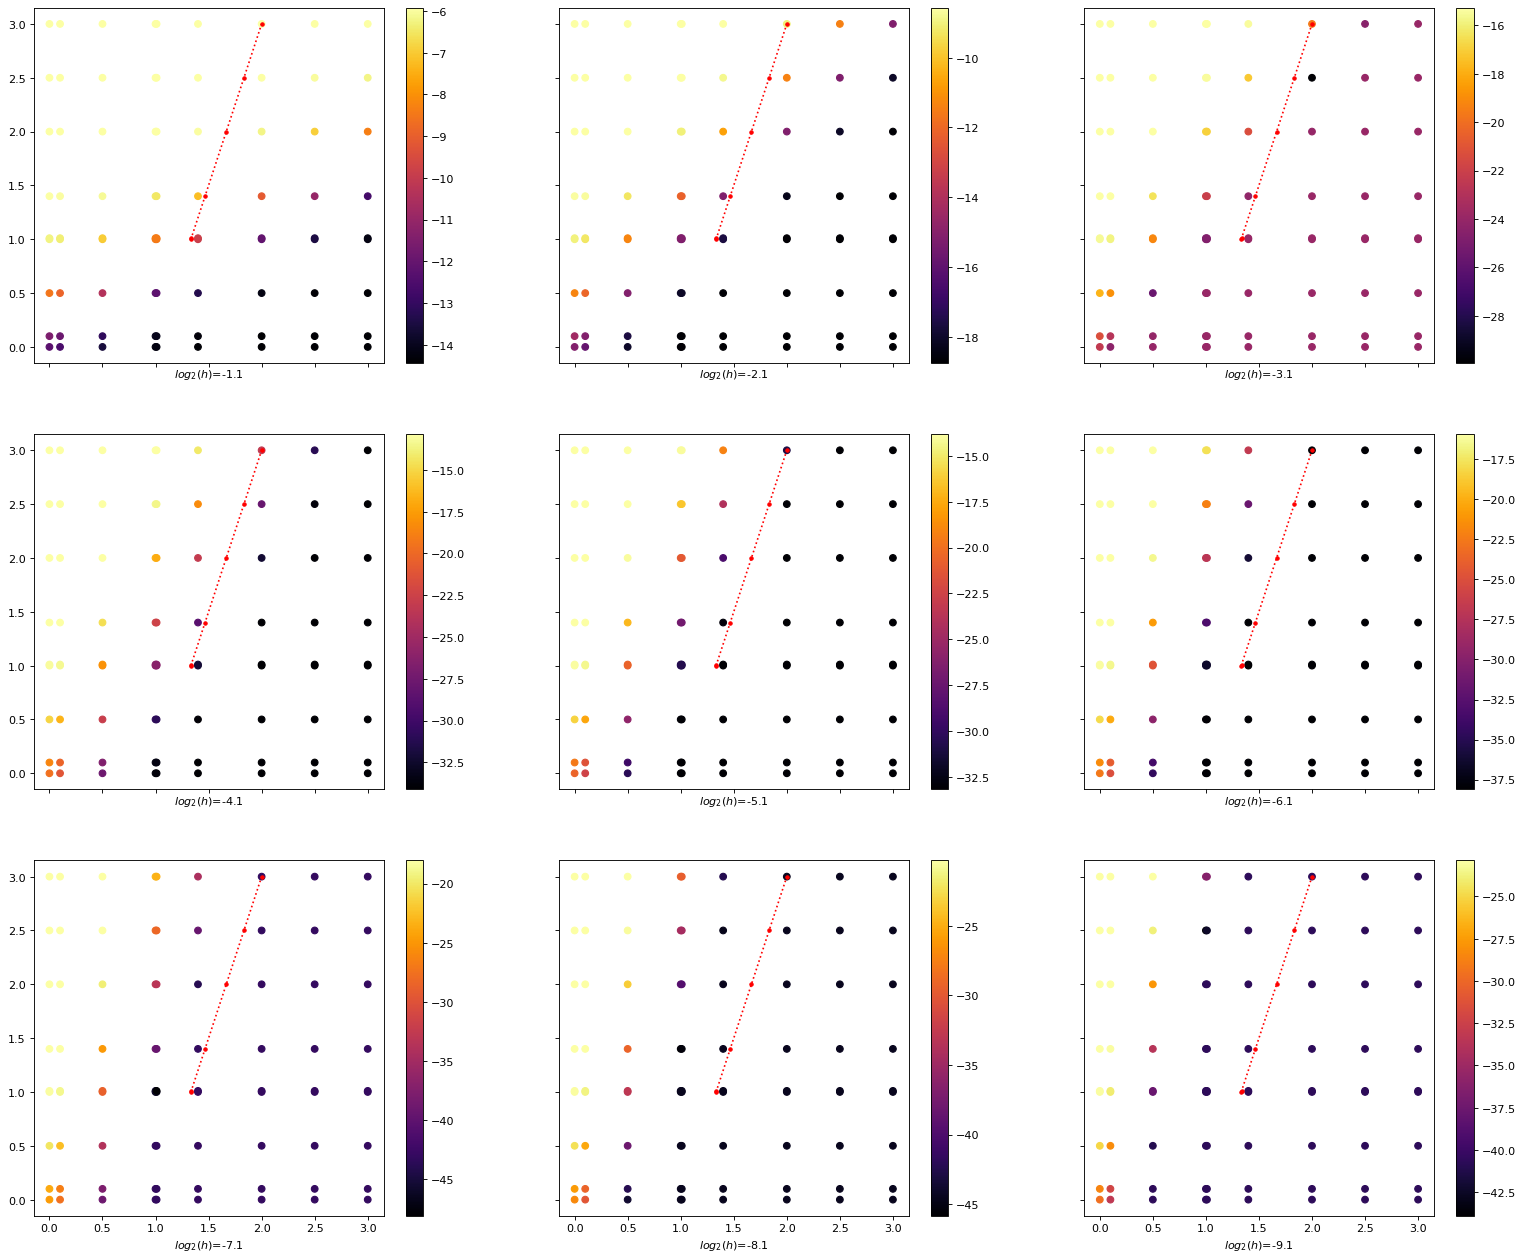

In [77]:
visualize_reconstruct_error_set_epislon(SWENO_AO_Recontruction_52_Continuous_parameterized, func_u_2, sqrt(8))

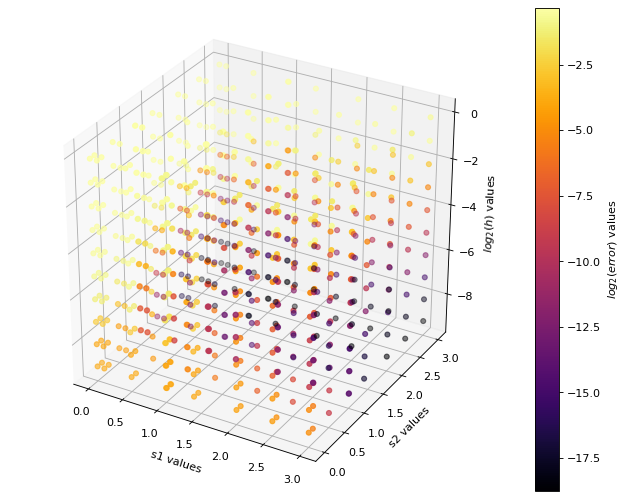

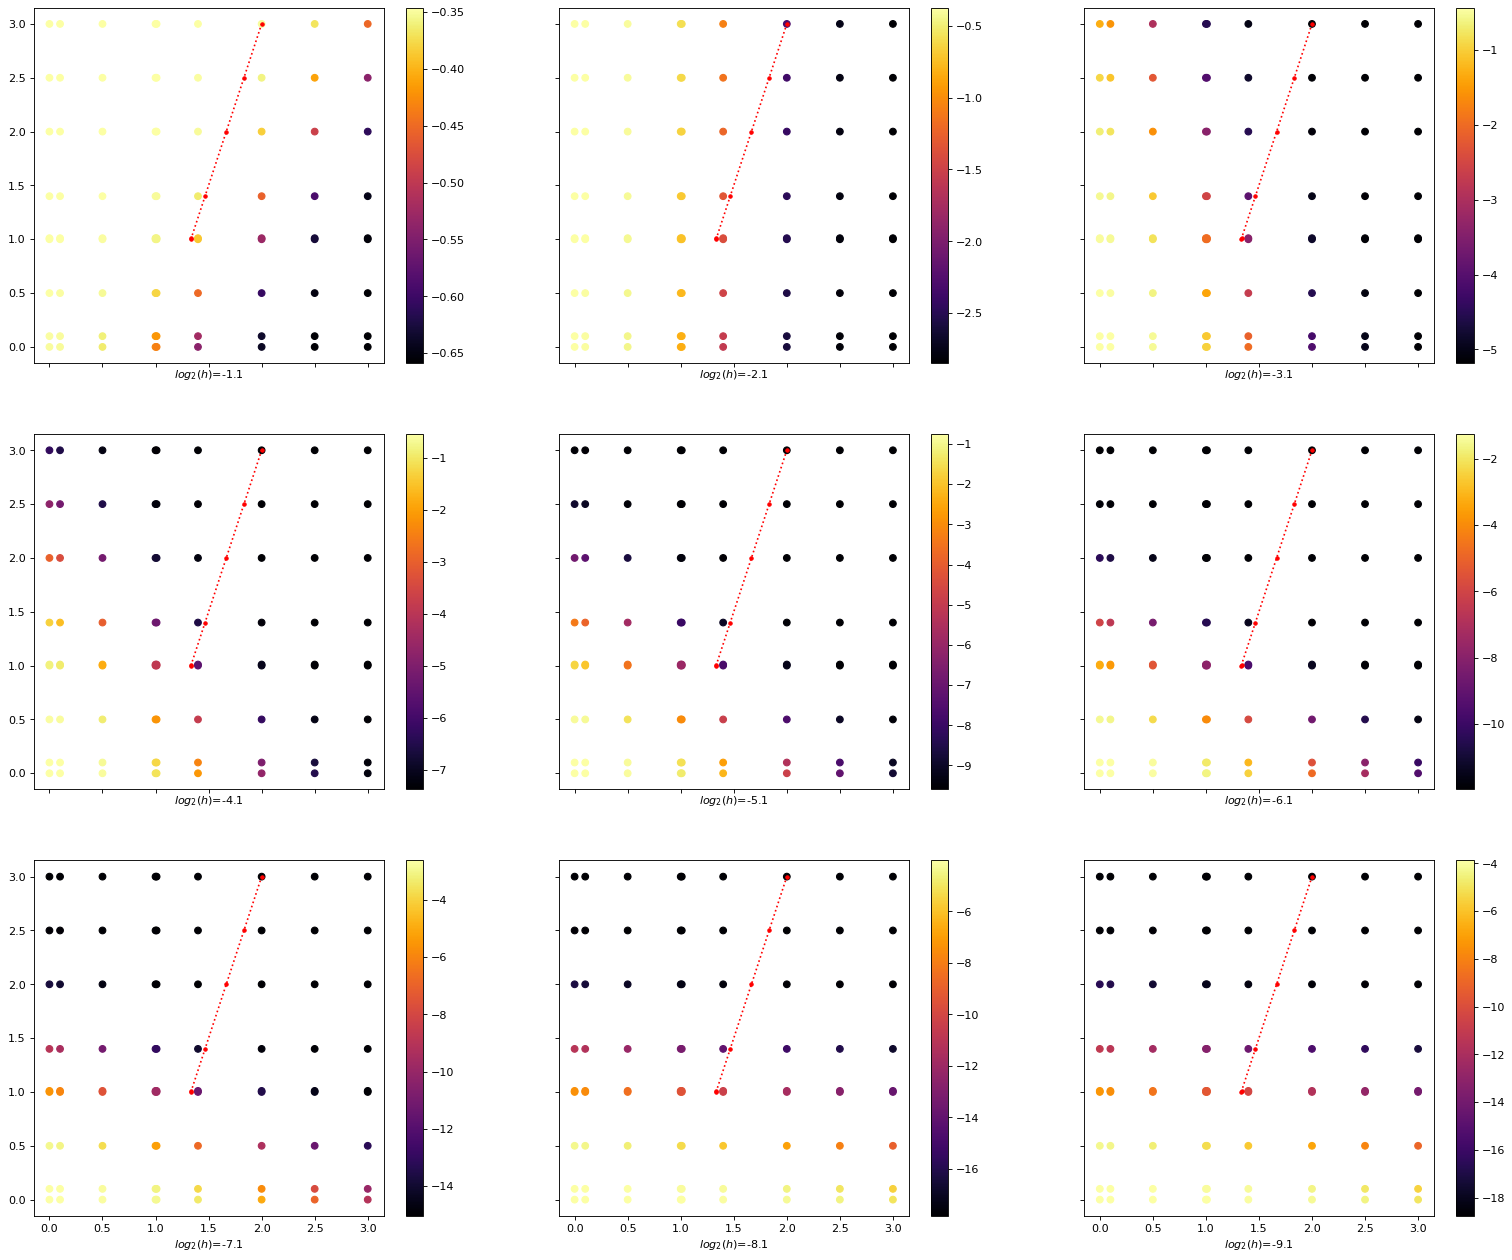

In [78]:
visualize_reconstruct_error_set_epislon(SWENO_AO_Recontruction_52_Discontinuous_parameterized, discontinuous_func_a, sqrt(2)+(2**-9))

#### Comparing WENO-AO(5,3) and SWENO-AO(5,2)

In [197]:
def visualize_WENO_SWENO(WENO_reconstruct, SWENO_reconstruct, func, t, is_continuous):
  h = [2**(-0.1*n-0.02) for n in range(10, 80)]

  target = t
  WENO_log_errors = []
  SWENO_log_errors = []
  for val in h: 
    if is_continuous:
      WENO_log_errors.append(np.log2(np.abs(WENO_reconstruct(val, target, integral_average, func) - func(target))))
      SWENO_log_errors.append(np.log2(np.abs(SWENO_reconstruct(val, target, integral_average, func) - func(target))))
    else:
      WENO_log_errors.append(np.log2(np.abs(WENO_reconstruct(val, target, func, sqrt(2)-(2**-9)) - func(target))))
      SWENO_log_errors.append(np.log2(np.abs(SWENO_reconstruct(val, target, func, sqrt(2)-(2**-9)) - func(target))))

  log_h = [np.log2(val) for val in h]

  plt.figure(figsize=(10, 9), dpi=80)
  plt.scatter(log_h, WENO_log_errors, c='coral', marker='o')
  plt.scatter(log_h, SWENO_log_errors, c='blue', marker='^')
  plt.title('WENO-AO(5,3) vs. SWENO-AO(5,2)')
  plt.xlabel("$log_2(h)$")
  plt.ylabel("$log_2(error)$")
  plt.legend(("WENO-AO(5,3)", "SWENO-AO(5,2)"))
  plt.show()
  # fig, ax = plt.subplots(figsize=(10, 4))
  # ax.plot(log_h, log_errors, 'o')
  # ax.set_xlabel("$log(h)$", fontsize=18)
  # ax.set_ylabel("$log(error)$", fontsize=18)
  # ax.set_ylim(min(log_errors), max(log_errors))
  # ax.set_xlim(min(log_h), max(log_h))
  # plt.show()

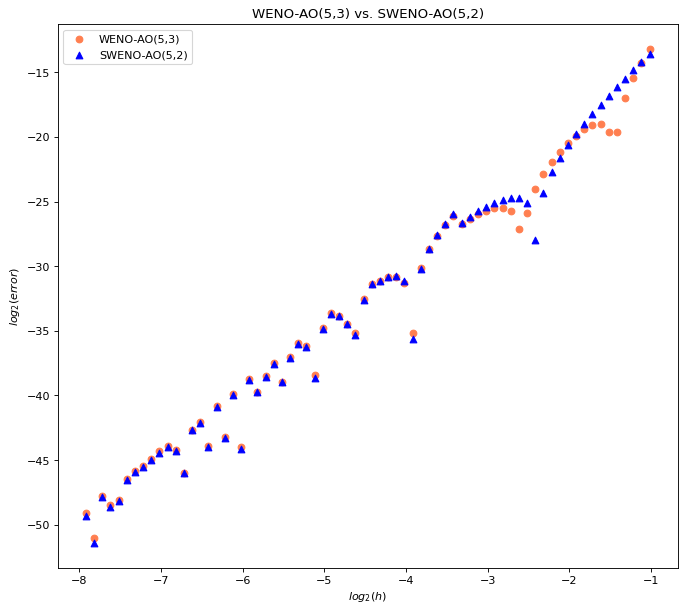

In [232]:
visualize_WENO_SWENO(WENO_AO_Recontruction, SWENO_AO_Recontruction_52, func_u_2, 0.1, True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: LinAlgWarning: Ill-conditioned matrix (rcond=9.43189e-17): result may not be accurate.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: LinAlgWarning: Ill-conditioned matrix (rcond=5.45622e-17): result may not be accurate.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: LinAlgWarning: Ill-conditioned matrix (rcond=9.91007e-17): result may not be accurate.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: LinAlgWarning: Ill-conditioned matrix (rcond=3.90383e-17): result may not be accurate.
  del sys.path[0]


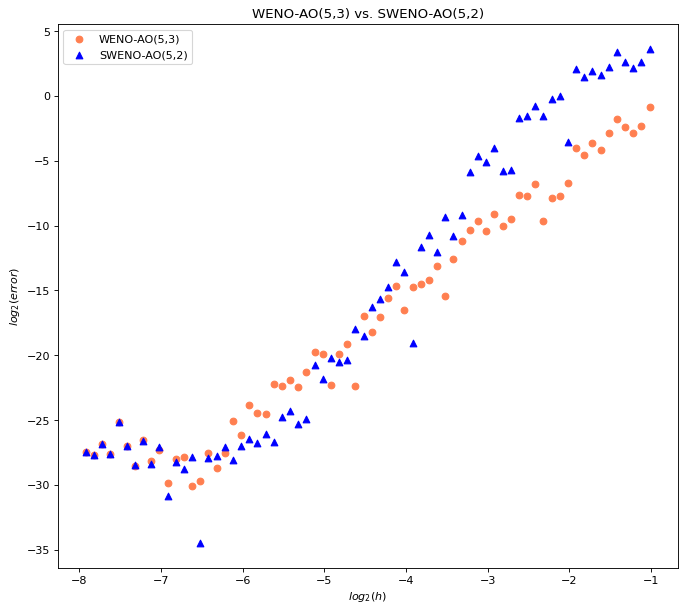

In [214]:
visualize_WENO_SWENO(WENO_AO_Recontruction, SWENO_AO_Recontruction_52, func_u_3, sqrt(40), True)

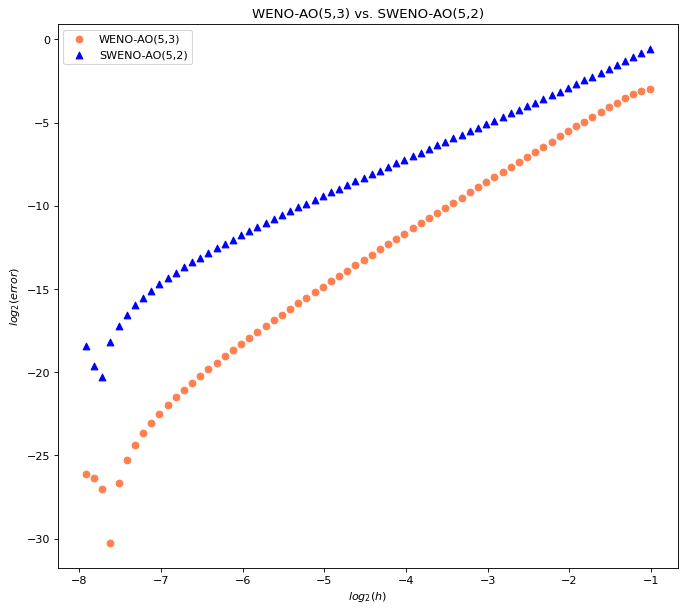

In [201]:
visualize_WENO_SWENO(WENO_AO_Recontruction_Discontinuous, SWENO_AO_Recontruction_52_Discontinuous, discontinuous_func_b, sqrt(2)+2**-9, False)

### Test different smoothness indicator for WENO-AO(5,3)

In [ ]:
# discontinuous case 

def WENO_AO_Recontruction_new_smoothness_indicator(h, x_i, func_u, break_point, is_smooth):
  # get five u_average
  if is_smooth: 
    x_vals, u_averages = get_u_average(5, h, x_i, integral_average, func_u)
  else:
    x_vals, u_averages = get_u_average_discontinuous_func(h, x_i, func_u, break_point)
  # print(x_vals)

  # calculate third order sigmas 
  # i-2 = 0, i = 2, i+2 = 4
  sigma_L = ((u_averages[1]-u_averages[0])**2 + (u_averages[2]-u_averages[1])**2) / 2
  sigma_C = ((u_averages[2]-u_averages[1])**2 + (u_averages[3]-u_averages[2])**2) / 2
  sigma_R = ((u_averages[3]-u_averages[2])**2 + (u_averages[4]-u_averages[3])**2) / 2
d
  # get sigma^5  
  sigma_5 = ((u_averages[1]-u_averages[0])**2 + 
             (u_averages[2]-u_averages[1])**2 + 
             (u_averages[3]-u_averages[2])**2 +  
             (u_averages[4]-u_averages[3])**2) / 4

  # all sigma values 
  sigma_values = [sigma_5, sigma_L, sigma_C, sigma_R]
  # print([val/(h**2) for val in sigma_values])

  # initialize gamma
  gamma_5 = 0.4 
  gamma_L = gamma_C = gamma_R = 0.2 
  initial_gamma_values = [gamma_5, gamma_L, gamma_C, gamma_R]

  # calculate \hat{gamma}  
  hat_gamma_values = []
  epsilon = 1
  eta = 2
  for index in range(4):
    hat_gamma_values.append(initial_gamma_values[index] / ((sigma_values[index] + epsilon*(h**2))**eta))

  # calculate \tilde{gamma}  
  sum_hat_gamma_values = sum(hat_gamma_values)
  tilde_gamma_values = [val / sum_hat_gamma_values for val in hat_gamma_values]
  print(tilde_gamma_values)
  # recontruct polynomial functions  
  P_5 = fifth_order_reconstruction(x_vals, u_averages, h, x_i)
  P_3_values = [] 
  for index in range(3): 
    P_3_values.append(third_order_reconstruction(
        x_vals[index:index+4], u_averages[index:index+3], h, x_i))

  # reconstruct the whole equation 
  # print((tilde_gamma_values[0]/initial_gamma_values[0]))

  R = (tilde_gamma_values[0]/initial_gamma_values[0]) * \
        (P_5 - sum(initial_gamma_values[i+1]*P_3_values[i] for i in range(3))) + \
        sum(tilde_gamma_values[i+1]*P_3_values[i] for i in range(3))

  return R

[0.6619965969131961, 0.4456279151663872, 0.8134068664151841, 0.8783652786600051]
[0.7402373961133084, 0.7751884517967677, 0.9117253648155813, 0.7052863404298491]
[0.7683347950750771, 0.7296806694583367, 0.9217685160695914, 0.8069889206918174]
[0.7807301595842437, 0.6795925247510818, 0.9116847068982287, 0.8818677944174058]
[0.778044349178496, 0.6271968095667145, 0.8852566891063799, 0.9288918887902773]
[0.8408821323624465, 0.8463505867001028, 0.9496810275890564, 0.83541367802479]
[0.8529863496032118, 0.7985834546969657, 0.9474850171304263, 0.9073892445094582]
[0.8477355563633482, 0.7451347037587249, 0.9263519269322723, 0.9503364089679717]
[0.8276310143763024, 0.6886639780636133, 0.8905185553750236, 0.9665980506889916]
[0.8955170265209603, 0.8440074656618987, 0.9599379859934144, 0.947026587380022]
[0.8816108470913799, 0.7903928648663955, 0.9347292017056755, 0.9728288293163646]
[0.9233627643914498, 0.8953822452900747, 0.9737751373576223, 0.9513432834928249]
[0.9121204273327927, 0.845983497

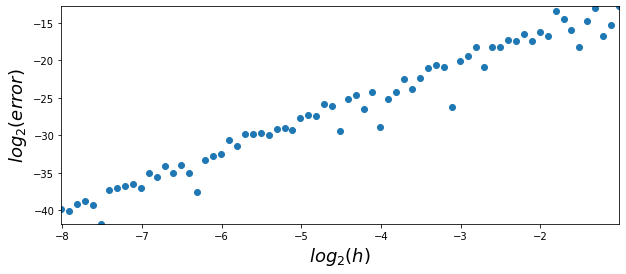

LinregressResult(slope=3.8833572343504366, intercept=-9.06363773412252, rvalue=0.9835100384955898, pvalue=5.540145671999704e-53, stderr=0.08596685195821381)

In [ ]:
h = [2**(-0.1*n-0.01) for n in range(10,81)]
target = sqrt(2)
log_errors = []
for val in h: 
  log_errors.append(np.log2(np.abs(WENO_AO_Recontruction_new_smoothness_indicator(val, target, func_u_2, 0, True) - func_u_2(target))))

log_h = [np.log2(val) for val in h]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(log_h, log_errors, 'o')
ax.set_xlabel("$log_2(h)$", fontsize=18)
ax.set_ylabel("$log_2(error)$", fontsize=18)
ax.set_ylim(min(log_errors), max(log_errors))
ax.set_xlim(min(log_h), max(log_h))
plt.show()

stats.linregress(log_h, log_errors)

In [ ]:
[16.911664795044018, 16.911493491092887, 16.91174962358624, 16.91149678198571]

[0.39588280397144116, 0.29835213485541084, 0.16491698531115018, 0.1408480758619979]
[0.4208310166019525, 0.24816667140071313, 0.15033607354961392, 0.18066623844772034]
[0.43237663953122285, 0.20487425905594744, 0.13428295355674796, 0.2284661478560818]
[0.4297021234991292, 0.16784771511089136, 0.11768656682264451, 0.28476359456733497]
[0.4131221731620961, 0.13629329211304383, 0.10121216321182072, 0.34937237151303935]
[0.3841284472950098, 0.10946311865809509, 0.08535004890407397, 0.4210583851428212]
[0.3453569248211572, 0.08675908969773645, 0.07049722375322372, 0.4973867617278826]
[0.30033973968372163, 0.0677387093096445, 0.05699252211303993, 0.574929028893594]
[0.25298670083663544, 0.05205728271514106, 0.04510202557616694, 0.6498539908720565]
[0.20691845703913958, 0.03939334963931822, 0.03498139129549871, 0.7187068020260434]
[0.16489704784177128, 0.029398012994019562, 0.026650619444763483, 0.7790543197194457]
[0.1285552931959321, 0.021684942228192516, 0.020001625403261544, 0.82975813917

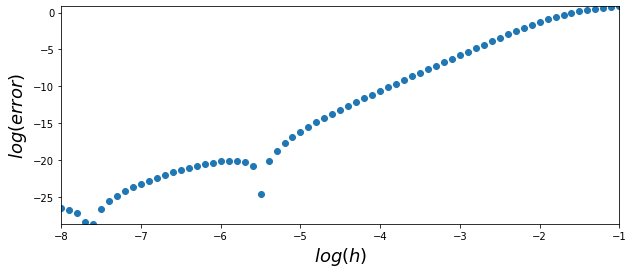

LinregressResult(slope=4.472303187833762, intercept=6.946530848014131, rvalue=0.9904338445233406, pvalue=4.306621662679134e-61, stderr=0.07501080242220592)

In [ ]:
h = [2**(-0.1*n) for n in range(10, 81)]

target = sqrt(2)+(2**-9)
log_errors = []
for val in h: 
  log_errors.append(np.log2(np.abs(WENO_AO_Recontruction_new_smoothness_indicator(val, target, discontinuous_func_3, sqrt(2)-(2**-9), False) - discontinuous_func_3(target))))

log_h = [np.log2(val) for val in h]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(log_h, log_errors, 'o')
ax.set_xlabel("$log(h)$", fontsize=18)
ax.set_ylabel("$log(error)$", fontsize=18)
ax.set_ylim(min(log_errors), max(log_errors))
ax.set_xlim(min(log_h), max(log_h))
plt.show()

stats.linregress(log_h, log_errors)

In [ ]:
# discontinuous case 

def WENO_AO_Recontruction_old_smoothness_indicator(h, x_i, func_u, break_point, is_smooth):
  # get five u_average
  if is_smooth: 
    x_vals, u_averages = get_u_average(5, h, x_i, integral_average, func_u)
  else:
    x_vals, u_averages = get_u_average_discontinuous_func(h, x_i, func_u, break_point)
  # print(x_vals)

  # calculate third order sigmas 
  # i-2 = 0, i = 2, i+2 = 4
  sigma_L = (13/12)*((u_averages[0]-2*u_averages[1]+u_averages[2])**2) + (1/4)*((  u_averages[0]-4*u_averages[1] + 3*u_averages[2])**2)
  sigma_C = (13/12)*((u_averages[1]-2*u_averages[2]+u_averages[3])**2) + (1/4)*((  u_averages[1] - u_averages[3])**2)
  sigma_R = (13/12)*((u_averages[2]-2*u_averages[3]+u_averages[4])**2) + (1/4)*((3*u_averages[2]-4*u_averages[3]  +  u_averages[4])**2)

  # calculate fifth order sigma 
  u_51 = (11*u_averages[0] - 82*u_averages[1] + 82*u_averages[3] - 11*u_averages[4]) / 120
  u_52 = (-3*u_averages[0] + 40*u_averages[1] - 74*u_averages[2] + 40*u_averages[3] -  3*u_averages[4]) / 56
  u_53 = (  -u_averages[0] +  2*u_averages[1] -  2*u_averages[3] +    u_averages[4]) / 12
  u_54 = (   u_averages[0] -  4*u_averages[1] +  6*u_averages[2] -  4*u_averages[3] +   u_averages[4]) / 24

  # get sigma^5
  sigma_5 = (u_51+(u_53/10))**2 + (13/3)*((u_52+123*u_54/455)**2) + (781/20)*(u_53**2) + (1421461/2275)*(u_54**2)

  # all sigma values 
  sigma_values = [sigma_5, sigma_L, sigma_C, sigma_R]

  # initialize gamma
  gamma_5 = 0.4 
  gamma_L = gamma_C = gamma_R = 0.2 
  initial_gamma_values = [gamma_5, gamma_L, gamma_C, gamma_R]

  # calculate \hat{gamma}  
  hat_gamma_values = []
  epsilon = 1
  eta = 1
  for index in range(4):
    hat_gamma_values.append(initial_gamma_values[index] / ((sigma_values[index] + epsilon*(h**2))**eta))

  # calculate \tilde{gamma}  
  sum_hat_gamma_values = sum(hat_gamma_values)
  tilde_gamma_values = [val / sum_hat_gamma_values for val in hat_gamma_values]
  print(tilde_gamma_values)
  # recontruct polynomial functions  
  P_5 = fifth_order_reconstruction(x_vals, u_averages, h, x_i)
  P_3_values = [] 
  for index in range(3): 
    P_3_values.append(third_order_reconstruction(
        x_vals[index:index+4], u_averages[index:index+3], h, x_i))

  # reconstruct the whole equation 
  R = (tilde_gamma_values[0]/initial_gamma_values[0]) * \
        (P_5 - sum(initial_gamma_values[i+1]*P_3_values[i] for i in range(3))) + \
        sum(tilde_gamma_values[i+1]*P_3_values[i] for i in range(3))

  return R

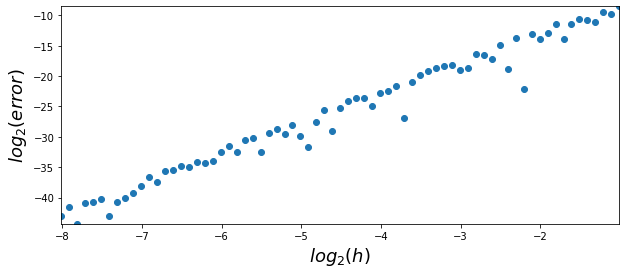

LinregressResult(slope=4.876887287188422, intercept=-3.9695845231954863, rvalue=0.9877549524039201, pvalue=2.0620298805954757e-57, stderr=0.09273221172439383)

In [ ]:
h = [2**(-0.1*n-0.01) for n in range(10,81)]
target = sqrt(2)
log_errors = []
for val in h: 
  log_errors.append(np.log2(np.abs(WENO_AO_Recontruction_old_smoothness_indicator(val, target, func_u_3, 0, True) -func_u_3(target))))

log_h = [np.log2(val) for val in h]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(log_h, log_errors, 'o')
ax.set_xlabel("$log_2(h)$", fontsize=18)
ax.set_ylabel("$log_2(error)$", fontsize=18)
ax.set_ylim(min(log_errors), max(log_errors))
ax.set_xlim(min(log_h), max(log_h))
plt.show()

stats.linregress(log_h, log_errors)

[0.07261805252703016, 0.07419575557307258, 0.26229705524878244, 0.5908891366511149]
[0.06114919118453193, 0.06523642944890676, 0.22859841641919112, 0.6450159629473701]
[0.0512727561695928, 0.05699564780485626, 0.19671276687829703, 0.695018829147254]
[0.042855570181190135, 0.049521107722112455, 0.16766445897194765, 0.7399588631247498]
[0.0357512409164384, 0.04283717996433441, 0.141955867732053, 0.7794557113871742]
[0.02980319363984284, 0.03693584647469056, 0.11968711290937428, 0.8135738469760924]
[0.024853108595972014, 0.03177971707585573, 0.10069270575597636, 0.8426744685721959]
[0.020749686959361174, 0.027310677560170058, 0.08466022616959602, 0.8672794093108728]
[0.017355035612607355, 0.023459383916168985, 0.07121728955883466, 0.887968290912389]
[0.014548037278959796, 0.020153110234126786, 0.05998716121025987, 0.9053116912766536]
[0.012225199603047498, 0.017321192522166552, 0.05061968581809512, 0.9198339220566908]
[0.010299824478616876, 0.01489825369125879, 0.04280534636113209, 0.9319

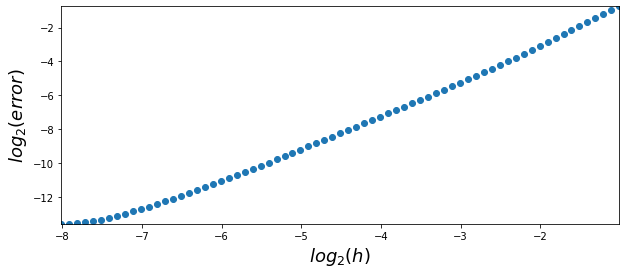

LinregressResult(slope=1.8969777197319482, intercept=0.5795577248719281, rvalue=0.9968338157243362, pvalue=1.2959110027685445e-77, stderr=0.018216040270633033)

In [ ]:
h = [2**(-0.1*n-0.01) for n in range(10,81)]
target = sqrt(2)
log_errors = []
for val in h: 
  log_errors.append(np.log2(np.abs(WENO_AO_Recontruction_old_smoothness_indicator(val, target, discontinuous_func_3, sqrt(2)-2**(-9), False) - discontinuous_func_3(target))))

log_h = [np.log2(val) for val in h]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(log_h, log_errors, 'o')
ax.set_xlabel("$log_2(h)$", fontsize=18)
ax.set_ylabel("$log_2(error)$", fontsize=18)
ax.set_ylim(min(log_errors), max(log_errors))
ax.set_xlim(min(log_h), max(log_h))
plt.show()

stats.linregress(log_h, log_errors)

In [ ]:
def visualize_two_WENO_method(func, t, is_smooth):
  h = [2**(-0.1*n-0.01) for n in range(10, 81)]

  target = t
  WENO_log_errors = []
  new_WENO_log_errors = []
  for val in h: 
    WENO_log_errors.append(np.log2(np.abs(
      WENO_AO_Recontruction_old_smoothness_indicator(val, target, func, sqrt(2)-(2**-9), is_smooth) - 
      func(target))))
    new_WENO_log_errors.append(np.log2(np.abs(
      WENO_AO_Recontruction_new_smoothness_indicator(val, target, func, sqrt(2)-(2**-9), is_smooth) - 
      func(target))))
    # new_WENO_log_errors.append(np.log2(np.abs(
    #   WENO_AO_Recontruction(val, target, integral_average, func) - 
    #   func(target))))

  log_h = [np.log2(val) for val in h]

  plt.figure(figsize=(10, 8), dpi=80)
  plt.scatter(log_h, WENO_log_errors, c='coral', marker='o')
  plt.scatter(log_h, new_WENO_log_errors, c='blue', marker='^')
  plt.title('WENO-AO(5,3), new-WENO-AO(5,2) $log_2(error)$ vs. $log_2(h)$')
  plt.xlabel("$log(h)$")
  plt.ylabel("$log(error)$")
  plt.legend(("WENO-AO(5,3)", "new-WENO-AO(5,2)"))
  plt.show()
  # fig, ax = plt.subplots(figsize=(10, 4))
  # ax.plot(log_h, log_errors, 'o')
  # ax.set_xlabel("$log(h)$", fontsize=18)
  # ax.set_ylabel("$log(error)$", fontsize=18)
  # ax.set_ylim(min(log_errors), max(log_errors))
  # ax.set_xlim(min(log_h), max(log_h))
  # plt.show()

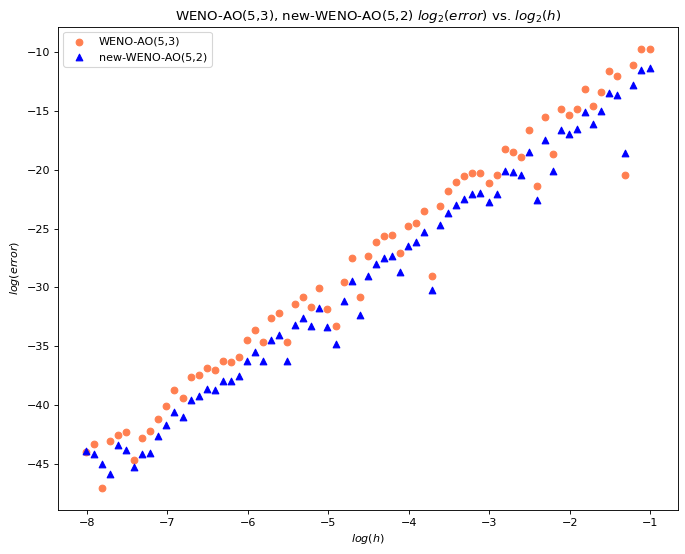

In [ ]:
visualize_two_WENO_method(func_u_2, sqrt(2), True)

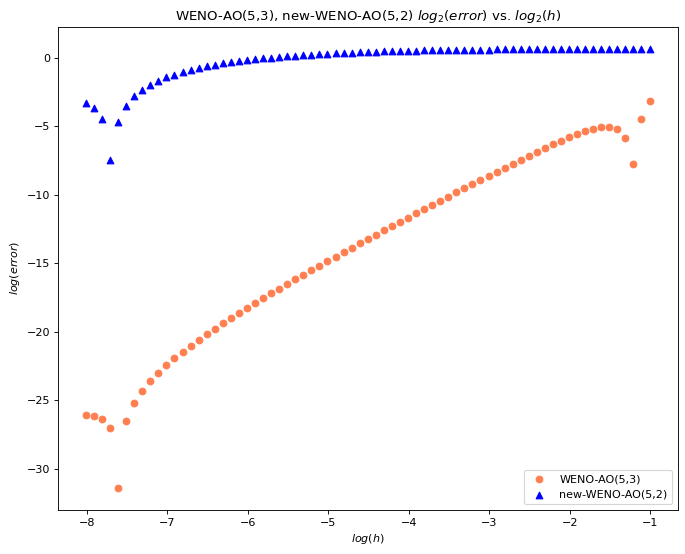

In [ ]:
visualize_two_WENO_method(discontinuous_func_3, sqrt(2)+(2**-9), False)

### Burgers Equation Visualization

0.2
0.28
0.36000000000000004
0.44
0.52
0.6000000000000001
0.68
0.76
0.8400000000000001
0.92
1.0


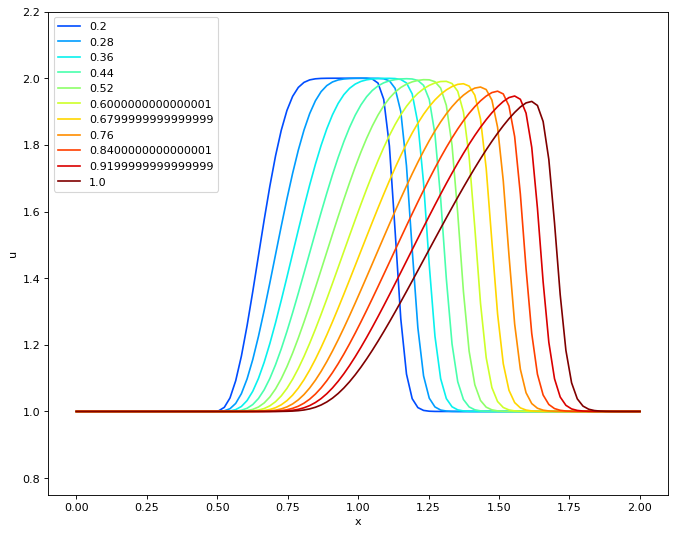

In [ ]:
import numpy as np

def calculate(nt, nx, tmax, xmax):
   """
   Returns the velocity field and distance for 1D linear convection
   """
   # Increments
   dt = tmax/(nt-1)
   dx = xmax/(nx-1)

   # Initialise data structures
   import numpy as np
   u = np.zeros((nx,nt))
   x = np.zeros(nx)

   # Boundary conditions
   u[0,:] = u[nx-1,:] = 1

   # Initial conditions
   for i in range(1,nx-1):
      if(i > (nx-1)/4 and i < (nx-1)/2):
         u[i,0] = 2
      else:
         u[i,0] = 1

   # Loop
   for n in range(0,nt-1):
      for i in range(1,nx-1):
         u[i,n+1] = u[i,n]-u[i,n]*(dt/dx)*(u[i,n]-u[i-1,n])

   # X Loop
   for i in range(0,nx):
      x[i] = i*dx

   return u, x

def plot_result(u,x,nt):
   import matplotlib.pyplot as plt
   import matplotlib.cm as cm
   plt.figure(figsize=(10, 8), dpi=80)
   colour=iter(cm.jet(np.linspace(1/5,1.0,11)))
   for i in range(30,nt,12):
      print(i*(1/150))
      c=next(colour)
      plt.plot(x,u[:,i],c=c)
      plt.xlabel('x')
      plt.ylabel('u')
      plt.ylim([0.75,2.2])
   plt.legend(list(np.linspace(1/5,1.0,11)))
   plt.show()

u,x = calculate(300, 100, 1.0, 2.0)
plot_result(u,x,151)

### Test order

In [147]:
def visualize_order(reconstruct_func, target_func, t):
  h_values = [2**(-n) for n in range(1, 8)]

  target = t

  cols = ['s1', 
          's2', 
          'order']

  data = []
  candidates_s = np.linspace(0.0, 3.0, num=20)
  s1_values = list(candidates_s)
  s2_values = list(candidates_s)
  # s1_values = [0, 0.1, 0.5, 1, 1.01, 1.4, 2, 2.5, 3]
  # s2_values = [0, 0.1, 0.5, 1, 1.01, 1.4, 2, 2.5, 3]
  for s2 in s2_values:
    for s1 in s1_values:
      log_h = []
      l_errors = []
      row = [s1, s2] 
      for h in h_values:
        log_h.append(np.log2(h))
        log_error = np.log2(np.abs(reconstruct_func(
                h, target, target_func, sqrt(2)-(2**-9), s1, s2, h**2) - 
                  target_func(target)))
        l_errors.append(log_error)
      row.append(stats.linregress(log_h, l_errors)[0])
      data.append(row)

  df = pd.DataFrame(data=data, columns=cols)
  return df

In [163]:
d1 = visualize_order(SWENO_AO_Recontruction_52_Continuous_parameterized, func_u_2, sqrt(8))

Text(0, 0.5, '$s_2$')

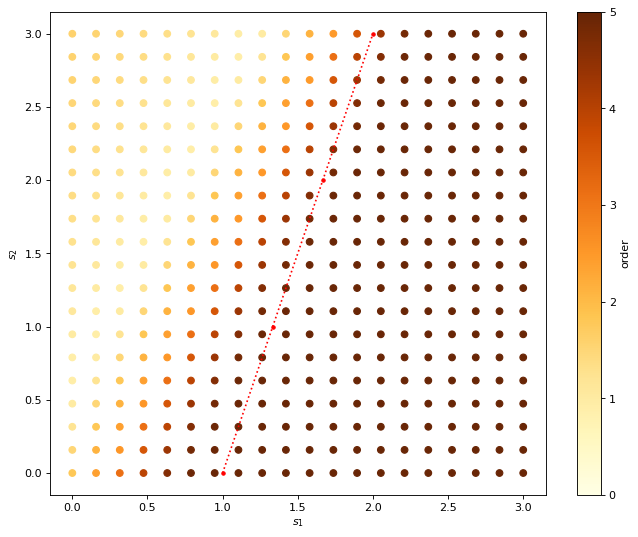

In [159]:
d = d1
fig_order = plt.figure(figsize=(10, 8), dpi=80)
cb = plt.scatter(d['s1'], d['s2'], c=d['order'], cmap=plt.get_cmap('YlOrBr'))
point_s2 = [0, 1, 2, 3]
point_s1 = [(4+v-1)/3 for v in point_s2]
plt.plot(point_s1, point_s2, c= "red", marker='.', linestyle=':')
plt.clim(0,5)
plt.colorbar(cb, label='order')
plt.xlabel('$s_1$')
plt.ylabel('$s_2$')

In [160]:
d2 = visualize_order(SWENO_AO_Recontruction_52_Discontinuous_parameterized, discontinuous_func_a, sqrt(2)+(2**-9))

In [165]:
d2

s1   s2     order
0    0.000000  0.0  0.286465
1    0.157895  0.0  0.287366
2    0.315789  0.0  0.288741
3    0.473684  0.0  0.290813
4    0.631579  0.0  0.293912
..        ...  ...       ...
395  2.368421  3.0  2.360395
396  2.526316  3.0  2.352049
397  2.684211  3.0  2.346607
398  2.842105  3.0  2.342769
399  3.000000  3.0  2.339565

[400 rows x 3 columns]

Text(0, 0.5, '$s_2$')

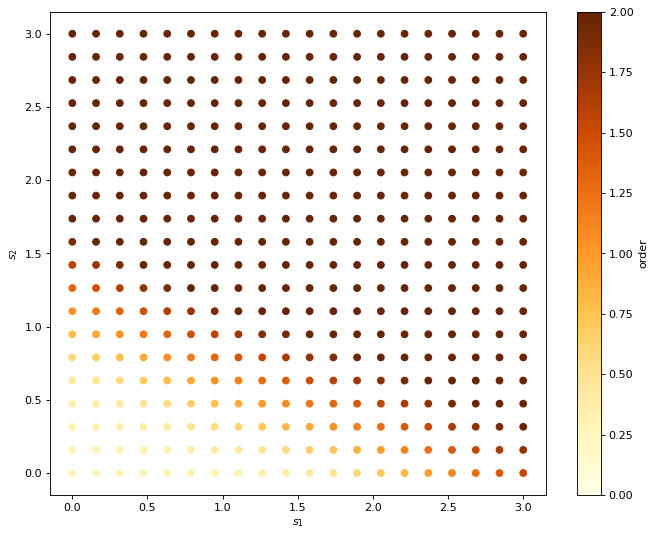

In [166]:
d = d2
fig_order = plt.figure(figsize=(10, 8), dpi=80)
cb = plt.scatter(d['s1'], d['s2'], c=d['order'], cmap=plt.get_cmap('YlOrBr'))
# point_s2 = [0, 1, 2, 3]
# point_s1 = [(4+v-1)/3 for v in point_s2]
# plt.plot(point_s1, point_s2, c= "red", marker='.', linestyle=':')
plt.clim(0,2)
plt.colorbar(cb, label='order')
plt.xlabel('$s_1$')
plt.ylabel('$s_2$')